In [33]:
import pandas as pd
import ast
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [34]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [35]:
recipes = pd.read_csv('../archive/PP_recipes.csv')
interactions = pd.read_csv('../archive/RAW_interactions.csv')
#df['replaced'].unique().tolist()


In [6]:
# Techniques - ordered!
TECHNIQUES_LIST = [
    'bake',
    'barbecue',
    'blanch',
    'blend',
    'boil',
    'braise',
    'brine',
    'broil',
    'caramelize',
    'combine',
    'crock pot',
    'crush',
    'deglaze',
    'devein',
    'dice',
    'distill',
    'drain',
    'emulsify',
    'ferment',
    'freez',
    'fry',
    'grate',
    'griddle',
    'grill',
    'knead',
    'leaven',
    'marinate',
    'mash',
    'melt',
    'microwave',
    'parboil',
    'pickle',
    'poach',
    'pour',
    'pressure cook',
    'puree',
    'refrigerat',
    'roast',
    'saute',
    'scald',
    'scramble',
    'shred',
    'simmer',
    'skillet',
    'slow cook',
    'smoke',
    'smooth',
    'soak',
    'sous-vide',
    'steam',
    'stew',
    'strain',
    'tenderize',
    'thicken',
    'toast',
    'toss',
    'whip',
    'whisk',
]

In [7]:
"""
Preprocessed data for recipes.
id = Recipe ID
i = recipe ID mapped to contiguous integers from 0
name_tokens = BPE-tokenized recipe name
ingredient_tokens = BPE-tokenized ingredients list (list of lists)
steps_tokens = BPE-tokenized steps
techniques = List of techniques used in recipe
calorie_level = Calorie level 
ingredient_ids = IDs of ingredients in recipe
"""
recipes

id       i                                        name_tokens  \
0       424415      23  [40480, 37229, 2911, 1019, 249, 6878, 6878, 28...   
1       146223   96900       [40480, 18376, 7056, 246, 1531, 2032, 40481]   
2       312329  120056     [40480, 21044, 16954, 8294, 556, 10837, 40481]   
3        74301  168258                       [40480, 10025, 31156, 40481]   
4        76272  109030  [40480, 17841, 252, 782, 2373, 1641, 2373, 252...   
...        ...     ...                                                ...   
178260  323143   76862  [40480, 6444, 1964, 9369, 486, 569, 17551, 40481]   
178261  149114  145962           [40480, 17027, 24715, 974, 11877, 40481]   
178262   34200   65066           [40480, 12187, 11434, 1738, 2627, 40481]   
178263   30618   77358  [40480, 870, 488, 1325, 519, 2220, 2417, 488, ...   
178264  263840  137160                 [40480, 30565, 12316, 1024, 40481]   

                                        ingredient_tokens  \
0       [[2911, 1019, 249, 6878], [1353], [6953], [153...   
1       [[17918], [25916], [2507, 6444], [8467, 1179],...   
2       [[5867, 24176], [1353], [6953], [1301, 11332],...   
3       [[1270, 1645, 28447], [21601], [27952, 29471, ...   
4       [[1430, 11434], [1430, 17027], [1615, 23, 695,...   
...                                                   ...   
178260  [[8780], [11835, 1762, 4465, 31494], [6812], [...   
178261  [[6812], [5940], [30645, 4785, 6821], [6953], ...   
178262  [[6167, 20930, 510], [1353], [15022, 6953], [6...   
178263  [[12395, 38308, 40118], [3137, 15022], [30878,...   
178264  [[3151, 12486], [2507, 6444], [30565], [17918]...   

                                             steps_tokens  \
0       [40480, 40482, 21662, 481, 6878, 500, 246, 161...   
1       [40480, 40482, 729, 2525, 10906, 485, 43, 8393...   
2       [40480, 40482, 8240, 481, 24176, 296, 1353, 66...   
3       [40480, 40482, 5539, 21601, 1073, 903, 2324, 4...   
4       [40480, 40482, 14046, 1430, 11434, 488, 17027,...   
...                                                   ...   
178260  [40480, 40482, 729, 2525, 715, 485, 26641, 404...   
178261  [40480, 40482, 729, 2525, 10906, 485, 43, 8393...   
178262  [40480, 40482, 500, 246, 1719, 5024, 240, 2366...   
178263  [40480, 40482, 562, 481, 10734, 240, 23667, 58...   
178264  [40480, 40482, 729, 2525, 10906, 485, 43, 2232...   

                                               techniques  calorie_level  \
0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...              0   
1       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...              0   
2       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...              1   
3       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...              0   
...                                                   ...            ...   
178260  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              1   
178261  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   
178262  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...              2   
178263  [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...              0   
178264  [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   

                                           ingredient_ids  
0                           [389, 7655, 6270, 1527, 3406]  
1       [2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...  
2       [1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...  
3        [7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]  
4                                 [3484, 6324, 7594, 243]  
...                                                   ...  
178260            [840, 208, 2499, 2683, 1925, 335, 1511]  
178261               [2499, 4717, 1168, 6270, 6324, 7040]  
178262  [2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...  
178263  [5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...  
178264  [6473, 800, 4807, 2683, 335, 1563, 1511,

In [8]:
"""      
user_id = User ID
recipe_id = Recipe ID
date = Date of interaction
rating = Rating given
review = Review text
"""
interactions

user_id  recipe_id        date  rating  \
0             38094      40893  2003-02-17       4   
1           1293707      40893  2011-12-21       5   
2              8937      44394  2002-12-01       4   
3            126440      85009  2010-02-27       5   
4             57222      85009  2011-10-01       5   
...             ...        ...         ...     ...   
1132362      116593      72730  2003-12-09       0   
1132363      583662     386618  2009-09-29       5   
1132364      157126      78003  2008-06-23       5   
1132365       53932      78003  2009-01-11       4   
1132366  2001868099      78003  2017-12-18       5   

                                                    review  
0        Great with a salad. Cooked on top of stove for...  
1        So simple, so delicious! Great for chilly fall...  
2        This worked very well and is EASY.  I used not...  
3        I made the Mexican topping and took it to bunk...  
4        Made the cheddar bacon topping, adding a sprin...  
...                                                    ...  
1132362  Another approach is to start making sauce with...  
1132363  These were so delicious!  My husband and I tru...  
1132364  WOW!  Sometimes I don't take the time to rate ...  
1132365  Very good!  I used regular port as well.  The ...  
1132366  I am so glad I googled and found this here. Th...  

[1132367 rows x 5 columns]

In [36]:
def name_technique(l):
    name_techniques = []
    for i in range(0, len(l)):
        if l[i] == 1:
            name_techniques.append(TECHNIQUES_LIST[i])
    return name_techniques        

In [37]:
## pour avoir les techniques d'une recette
tech0 = ast.literal_eval(recipes["techniques"][0])
name_technique(tech0)

['combine', 'drain', 'strain']

In [38]:
# Function to convert string representation of list to actual list
def convert_to_list(string):
    return ast.literal_eval(string)

In [39]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df1["id"] = recipes.id
df1["techniques"] = recipes.techniques.apply(lambda x:name_technique(ast.literal_eval(x)))
df1["nb_techniques"] = recipes.techniques.apply(lambda x:sum(ast.literal_eval(x)))
df2["id"] = interactions.recipe_id
df2["date"]= pd.to_datetime(interactions.date)
#df2["month"] = df2.date.apply(lambda x:x.month)


df_test = pd.merge(df1, df2, on='id', how='left')
print(df_test.isna().sum())
df_test.sort_values('date', ascending=True, inplace=True,ignore_index=True)
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test

id               0
techniques       0
nb_techniques    0
date             0
dtype: int64


id                                techniques  nb_techniques  \
0          992                           [bake, combine]              2   
1         4684    [drain, grill, marinate, pour, simmer]              5   
2          517                    [bake, combine, saute]              3   
3         4523  [combine, drain, fry, refrigerat, steam]              5   
4         7435                            [boil, simmer]              2   
...        ...                                       ...            ...   
935115  149257                 [bake, boil, knead, melt]              4   
935116  491512                        [bake, refrigerat]              2   
935117   11763                                    [bake]              1   
935118  314535                   [boil, simmer, skillet]              3   
935119   63786                                 [skillet]              1   

             date  year  month  
0      2000-01-25  2000      1  
1      2000-02-25  2000      2  
2      2000-02-25  2000      2  
3      2000-02-25  2000      2  
4      2000-03-13  2000      3  
...           ...   ...    ...  
935115 2018-12-19  2018     12  
935116 2018-12-19  2018     12  
935117 2018-12-19  2018     12  
935118 2018-12-19  2018     12  
935119 2018-12-20  2018     12  

[935120 rows x 6 columns]

In [13]:
df_test.loc[df_test.nb_techniques == 14]

id                                         techniques  \
301490  240925  [bake, boil, combine, drain, fry, mash, melt, ...   
544806  173108  [bake, boil, combine, crush, drain, melt, pour...   
594157  207617  [bake, blend, combine, deglaze, melt, pour, ro...   

        nb_techniques       date  year  month  
301490             14 2007-09-18  2007      9  
544806             14 2009-06-21  2009      6  
594157             14 2009-11-12  2009     11

In [14]:
df_test.loc[df_test.nb_techniques == 14].values[0]

array([240925,
       list(['bake', 'boil', 'combine', 'drain', 'fry', 'mash', 'melt', 'pour', 'refrigerat', 'simmer', 'skillet', 'soak', 'thicken', 'whisk']),
       14, Timestamp('2007-09-18 00:00:00'), 2007, 9], dtype=object)

In [15]:
nb_tech = df_test.nb_techniques
date = df_test.date
print("Max Step :",max(nb_tech))
print("Min Step :",min(nb_tech))

Max Step : 14
Min Step : 0


In [16]:
# Calculate the average number of steps per month
average_steps_per_month = df_test.groupby('month')['nb_techniques'].mean()
print(average_steps_per_month)

# Calculate the median number of steps per month
median_steps_per_month = df_test.groupby('month')['nb_techniques'].median()
print(median_steps_per_month)

month
1     3.319152
2     3.333920
3     3.328505
4     3.287394
5     3.305921
6     3.267858
7     3.264032
8     3.283445
9     3.292097
10    3.300261
11    3.359999
12    3.256569
Name: nb_techniques, dtype: float64
month
1     3.0
2     3.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
Name: nb_techniques, dtype: float64


In [17]:
x = date[0]
print(x)
def get_season(date):
    if date.month in [4,5] or (date.month == 3 and date.day >=20) or (date.month == 6 and date.day <20):
        return "spring"
    elif date.month in [7,8] or (date.month == 6 and date.day >=20) or (date.month == 9 and date.day <20):
        return "summer"
    elif date.month in [10,11] or (date.month == 9 and date.day >=20) or (date.month == 12 and date.day <20) :
        return "autumn"
    else :
        return "winter"
print(get_season(x))

2000-01-25 00:00:00
winter


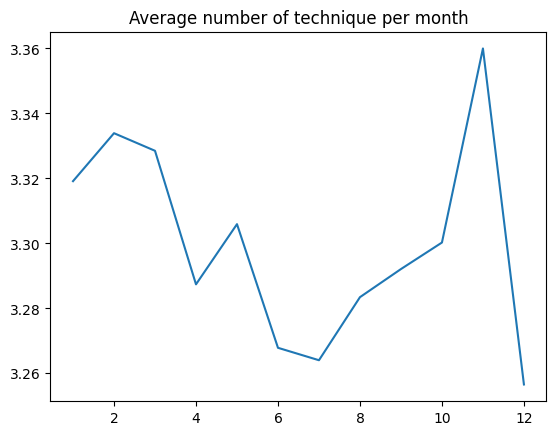

In [18]:
plt.figure()
plt.plot(average_steps_per_month.index,average_steps_per_month)
plt.title("Average number of technique per month")
plt.show()

In [19]:
# Aplatir les listes de techniques et répéter les autres colonnes en conséquence
df_flat = df_test.explode('techniques')
df_flat

id techniques  nb_techniques       date  year  month
0          992       bake              2 2000-01-25  2000      1
0          992    combine              2 2000-01-25  2000      1
1         4684      drain              5 2000-02-25  2000      2
1         4684      grill              5 2000-02-25  2000      2
1         4684   marinate              5 2000-02-25  2000      2
...        ...        ...            ...        ...   ...    ...
935117   11763       bake              1 2018-12-19  2018     12
935118  314535       boil              3 2018-12-19  2018     12
935118  314535     simmer              3 2018-12-19  2018     12
935118  314535    skillet              3 2018-12-19  2018     12
935119   63786    skillet              1 2018-12-20  2018     12

[3105105 rows x 6 columns]

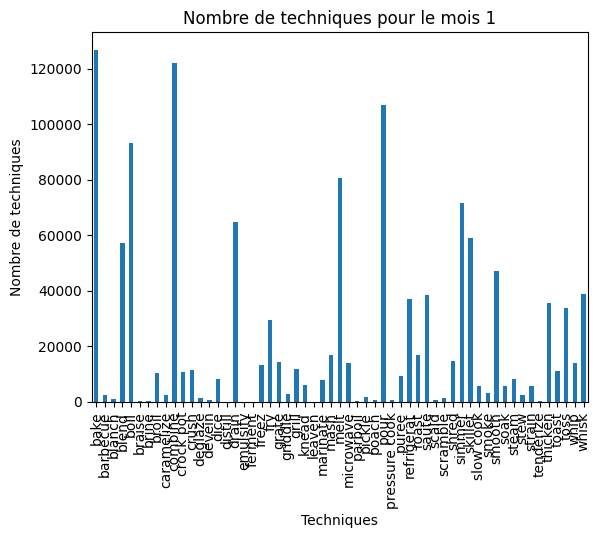

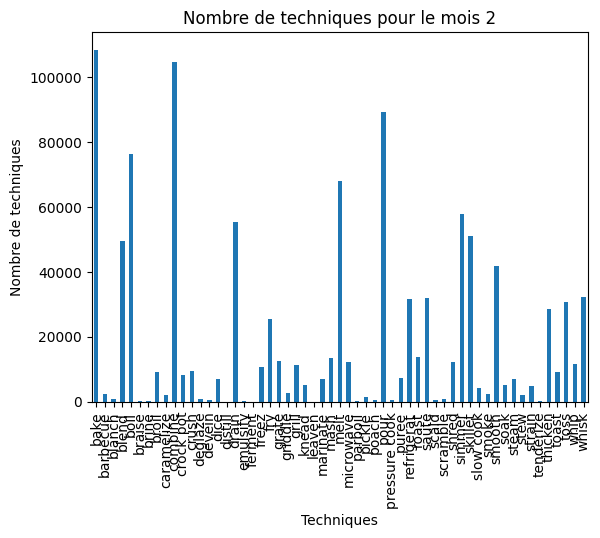

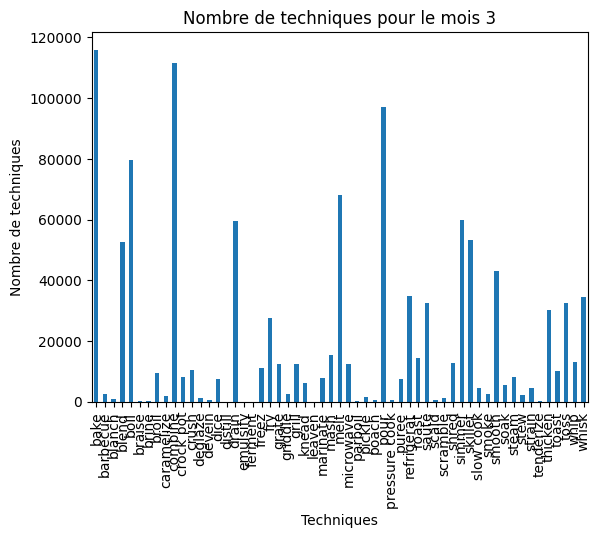

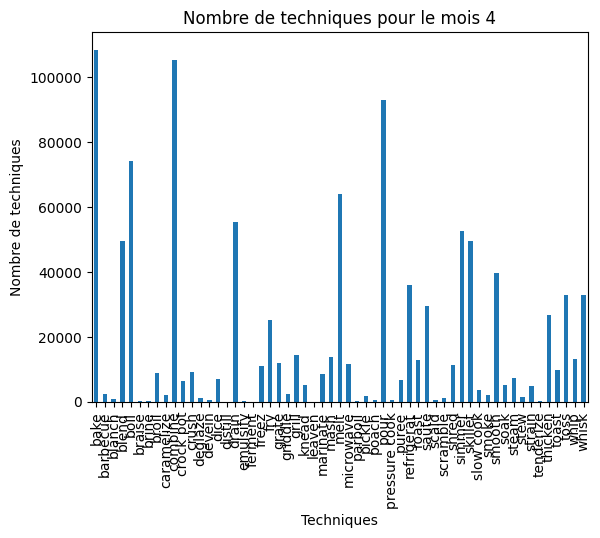

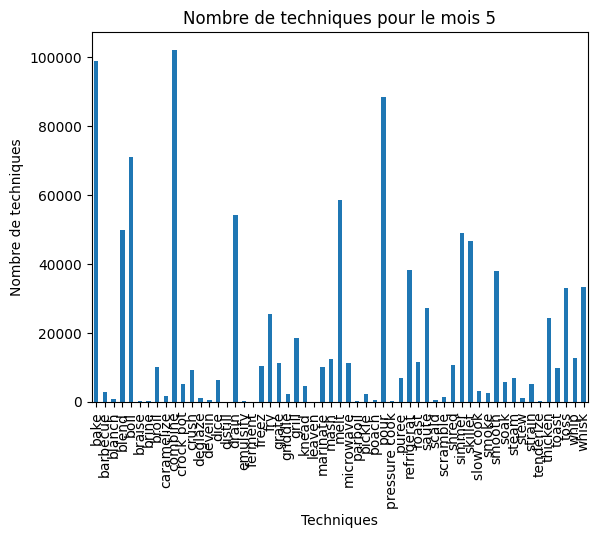

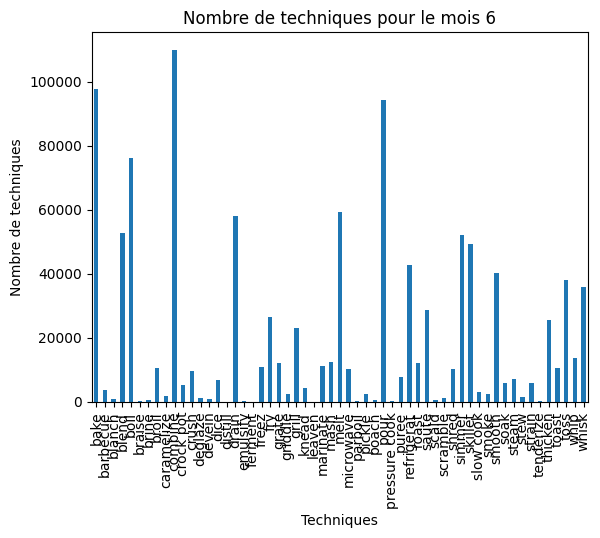

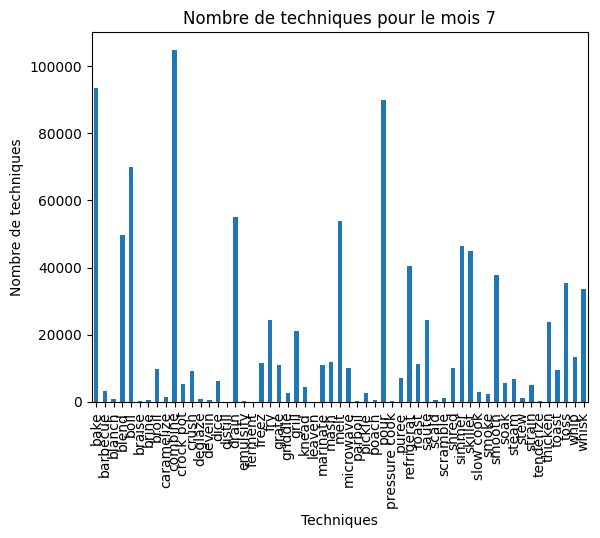

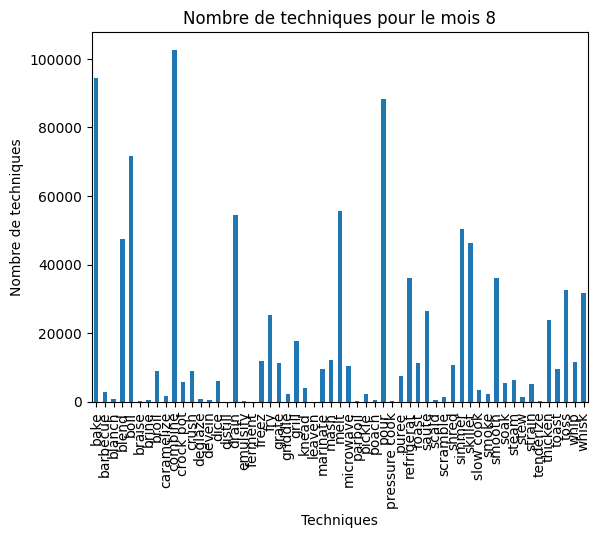

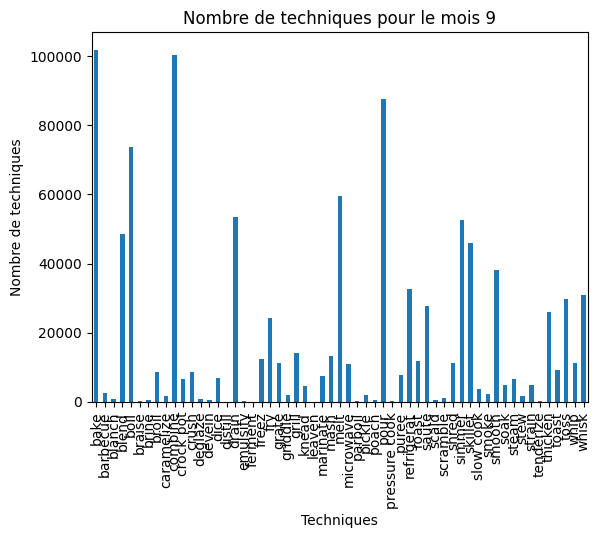

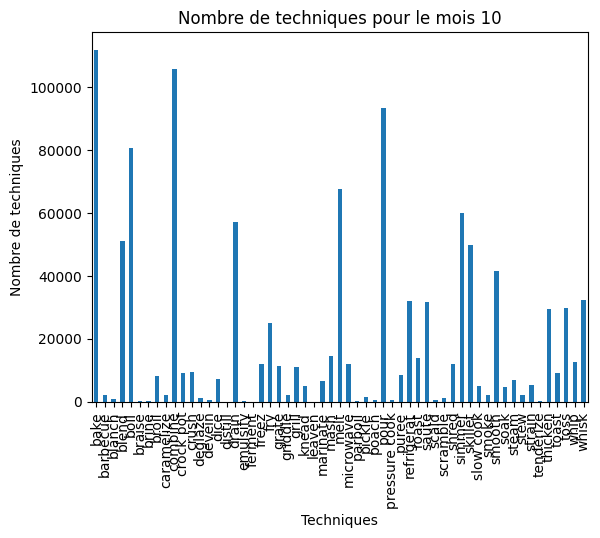

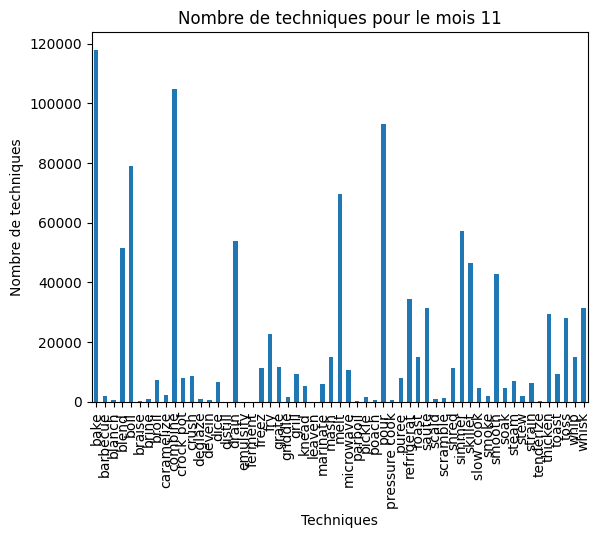

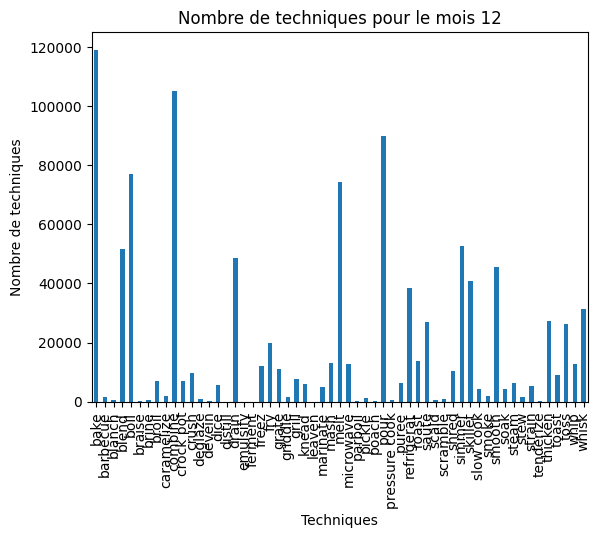

In [20]:
# Grouper par mois et par type de technique, puis compter le nombre de techniques
monthly_tech_count = df_flat.groupby(['month', 'techniques'])['nb_techniques'].sum().unstack()

# Créer un bar plot pour chaque mois
for month in monthly_tech_count.index:
    plt.figure()
    monthly_tech_count.loc[month].plot(kind='bar', stacked=True)
    plt.xlabel('Techniques')
    plt.ylabel('Nombre de techniques')
    plt.title(f'Nombre de techniques pour le mois {month}')
    plt.show()

<Figure size 640x480 with 0 Axes>

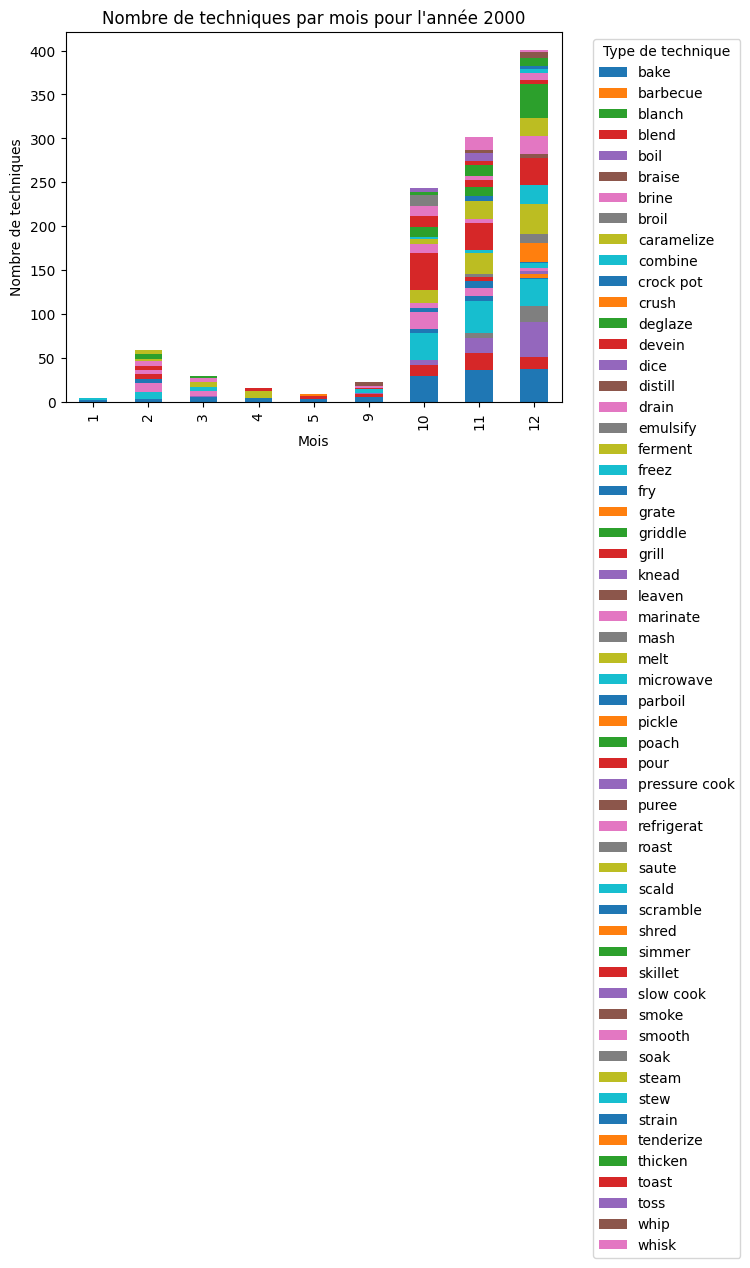

<Figure size 640x480 with 0 Axes>

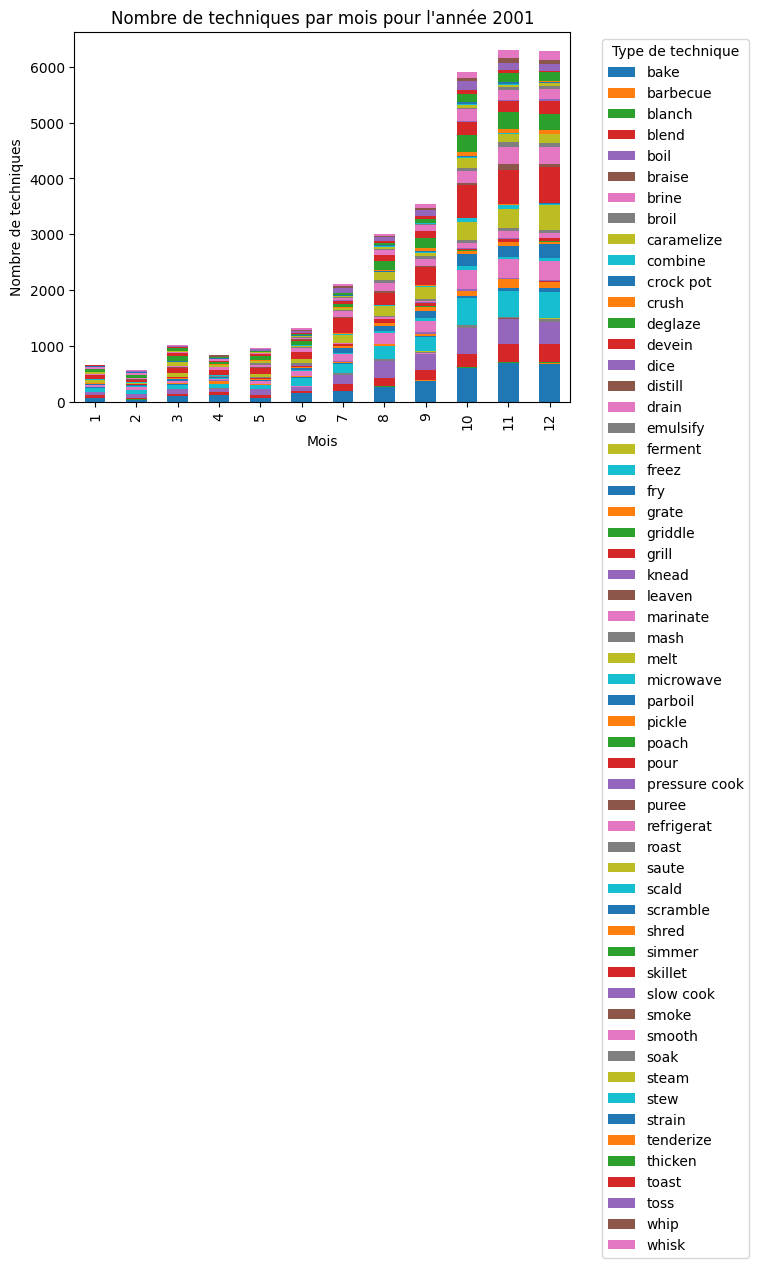

<Figure size 640x480 with 0 Axes>

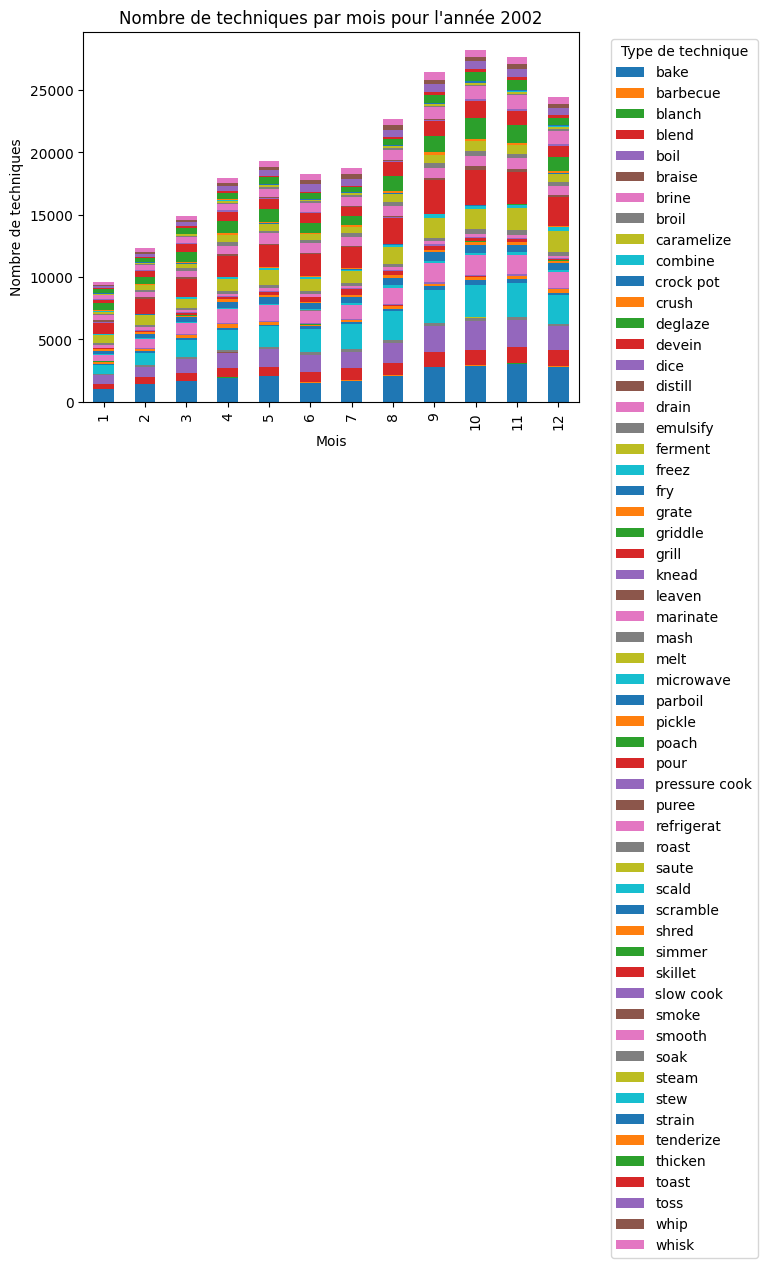

<Figure size 640x480 with 0 Axes>

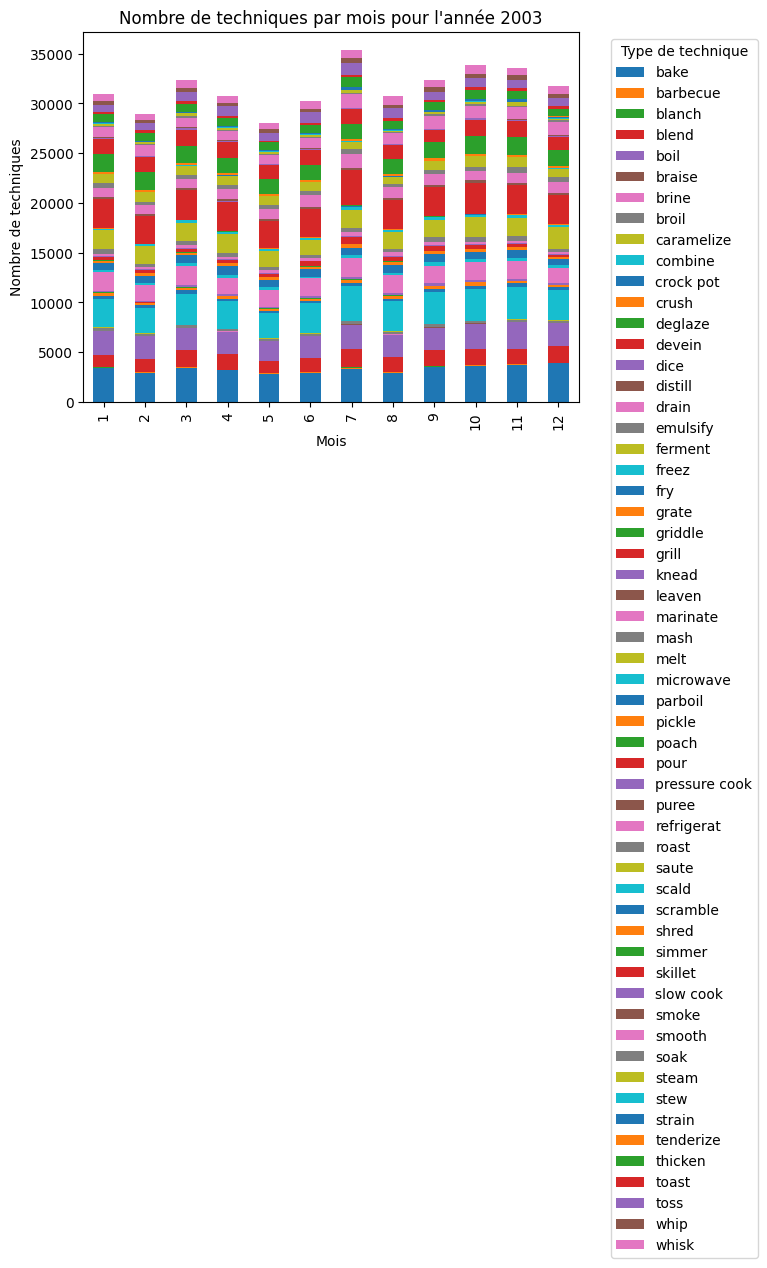

<Figure size 640x480 with 0 Axes>

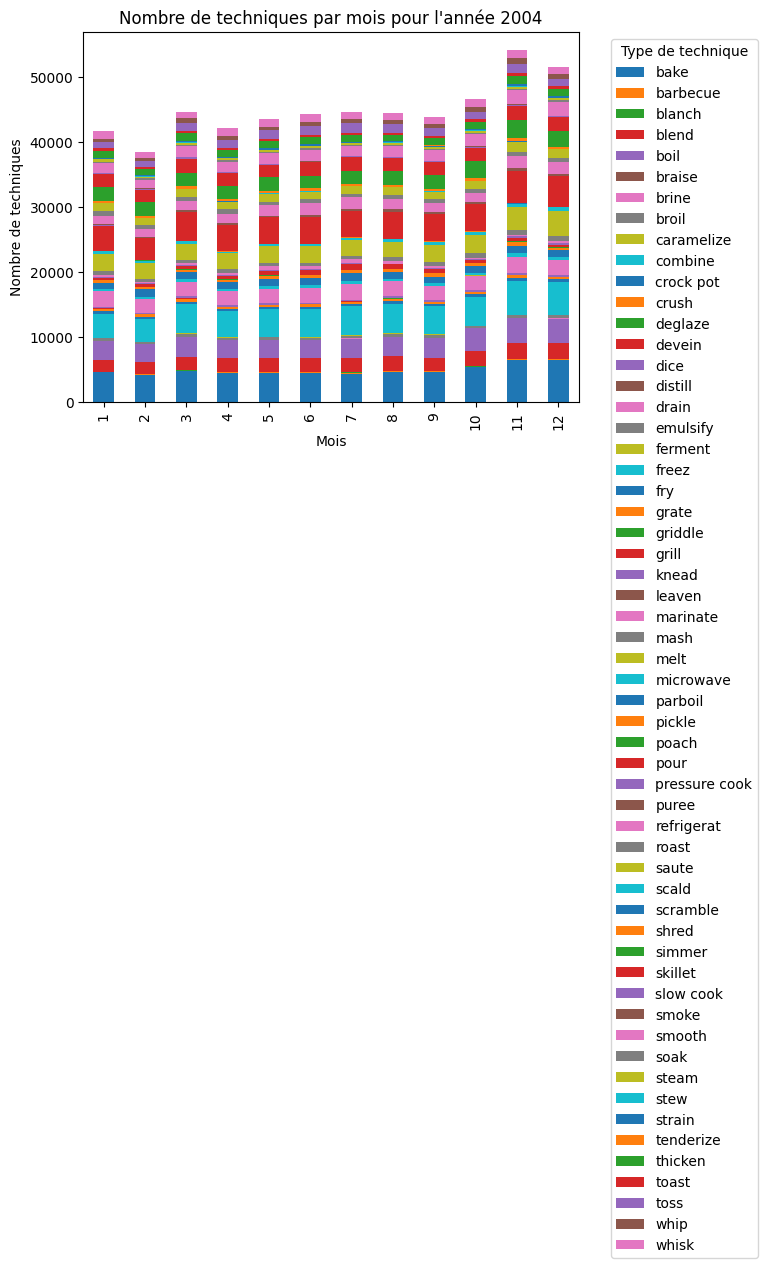

<Figure size 640x480 with 0 Axes>

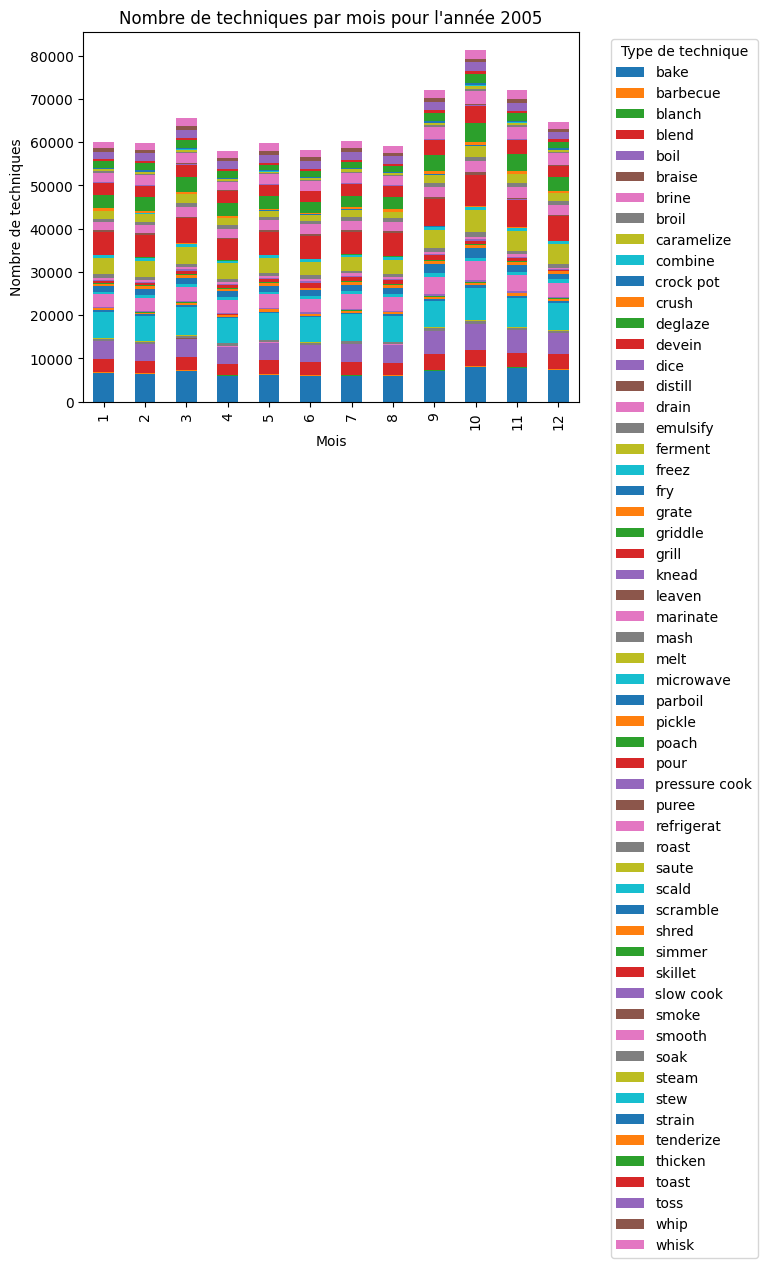

<Figure size 640x480 with 0 Axes>

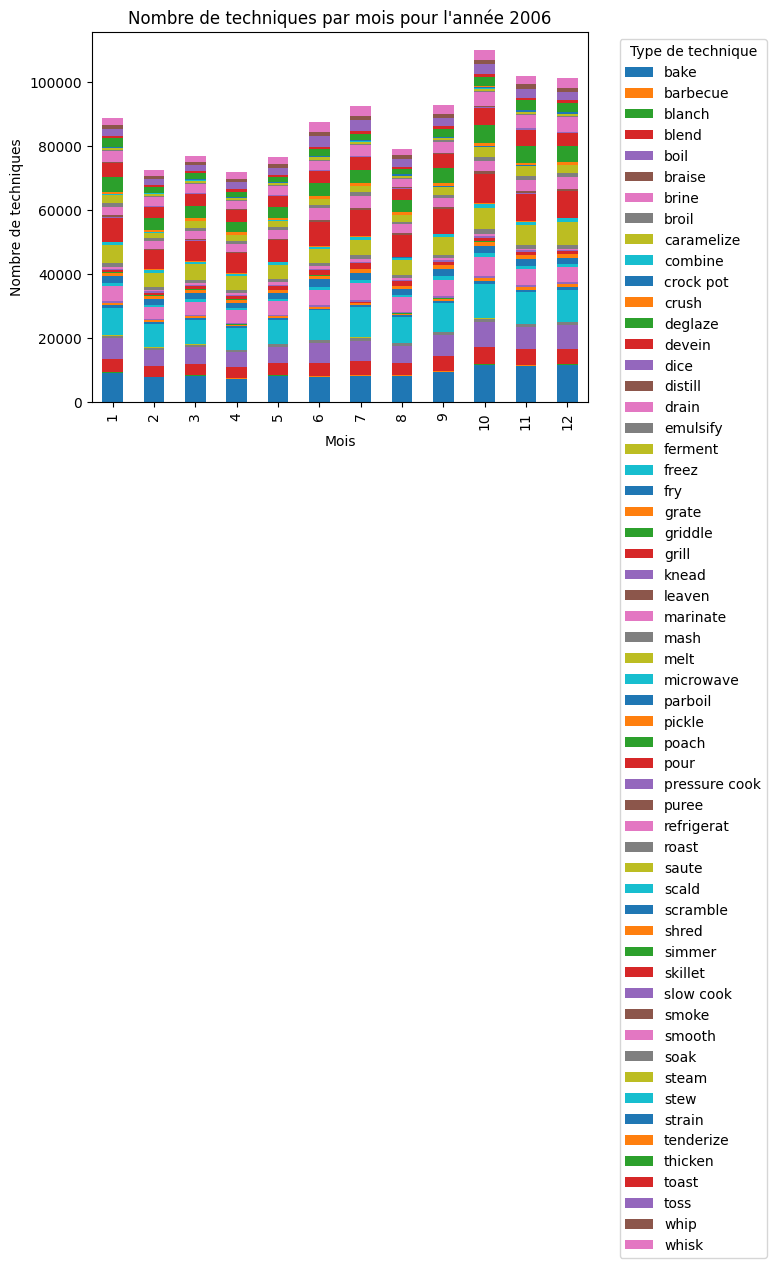

<Figure size 640x480 with 0 Axes>

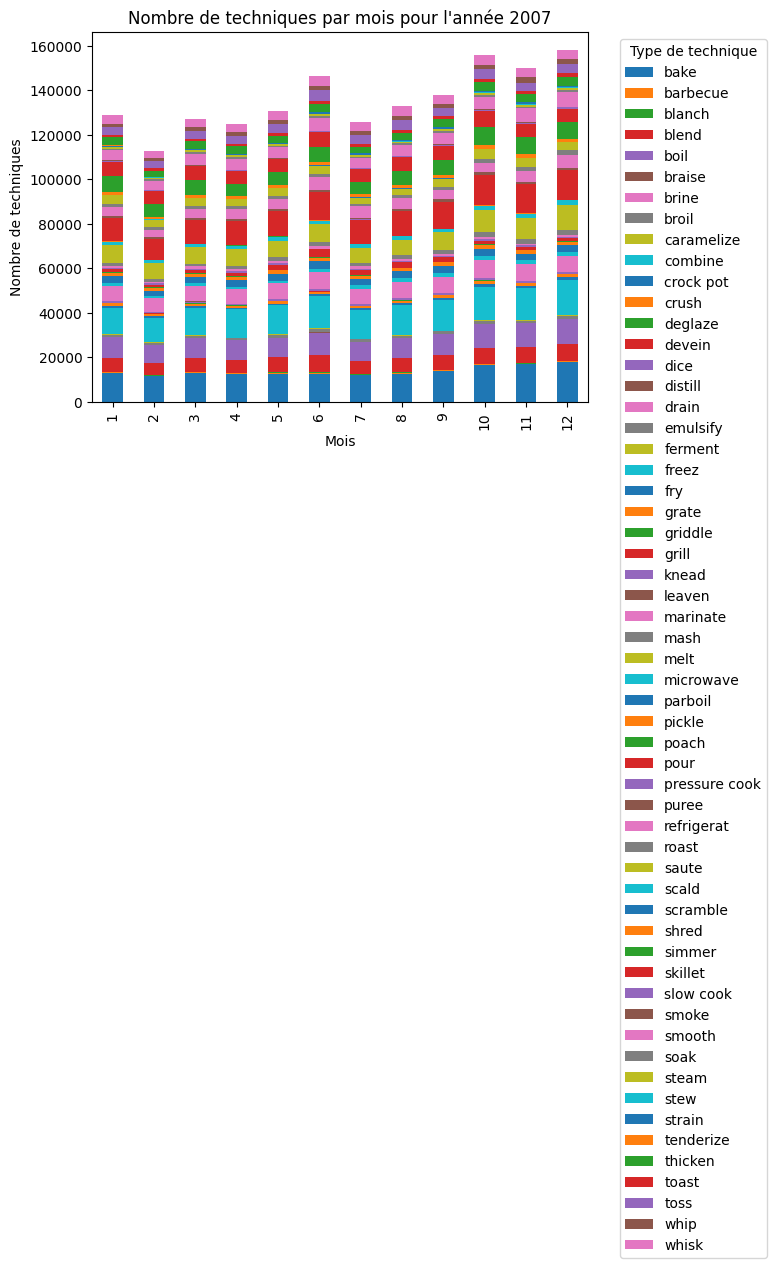

<Figure size 640x480 with 0 Axes>

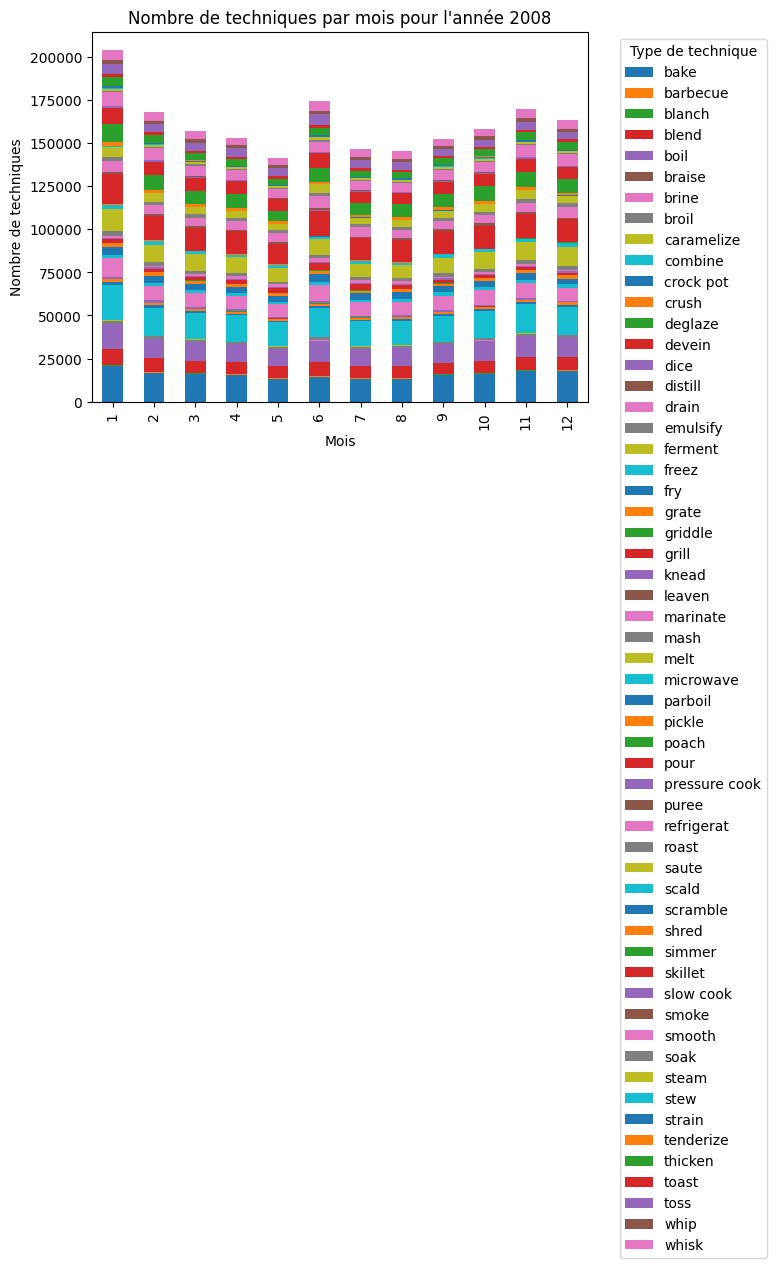

<Figure size 640x480 with 0 Axes>

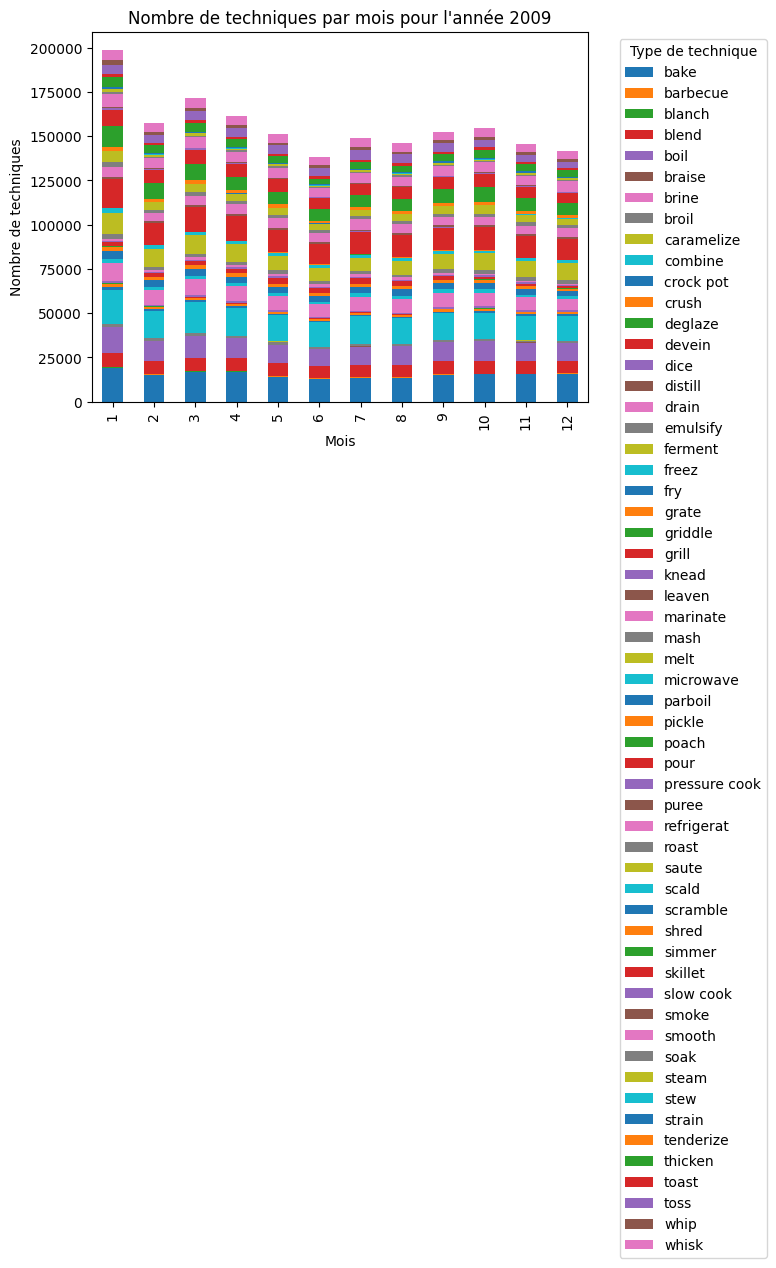

<Figure size 640x480 with 0 Axes>

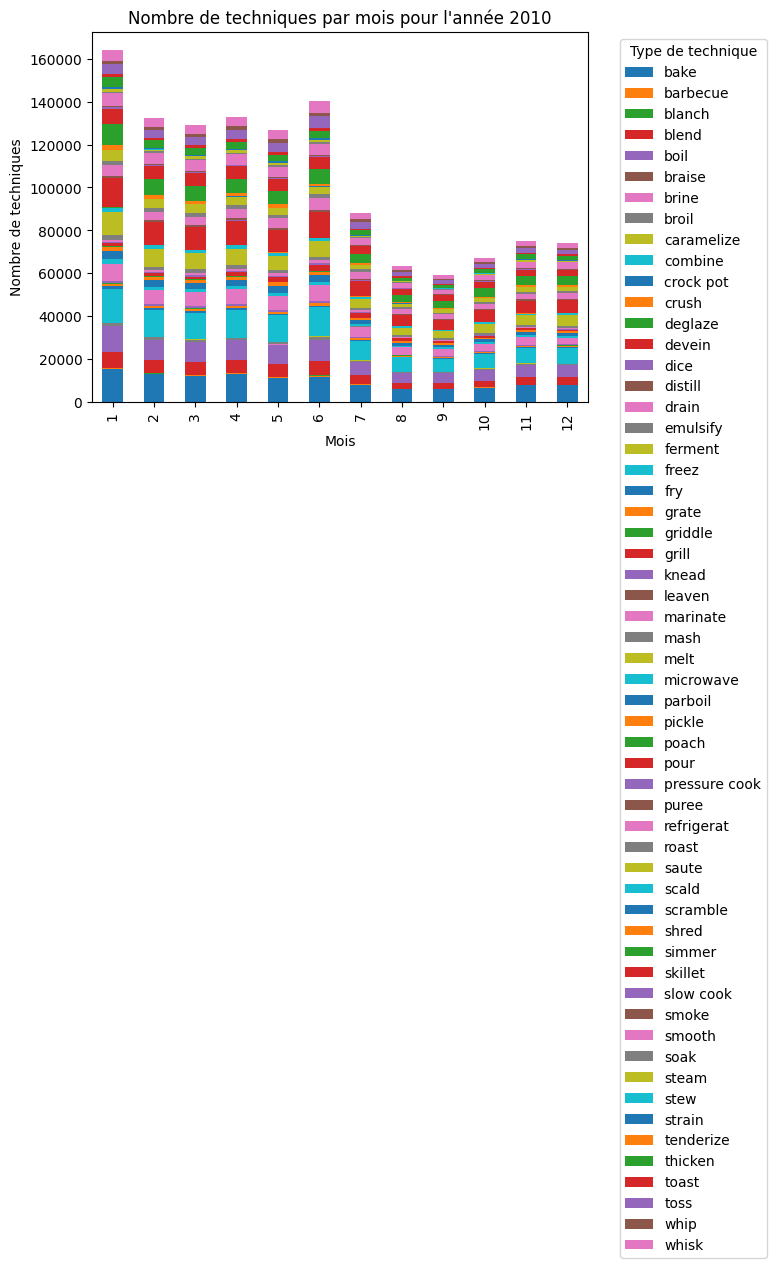

<Figure size 640x480 with 0 Axes>

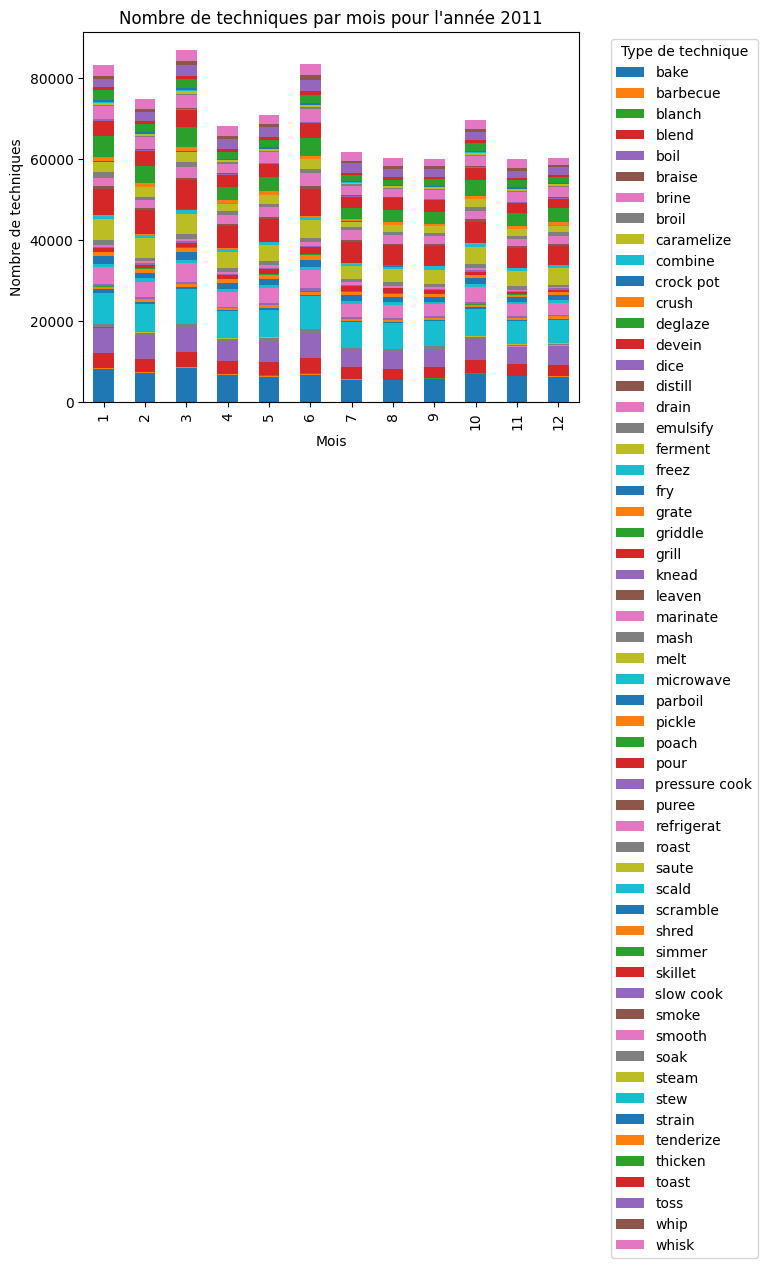

<Figure size 640x480 with 0 Axes>

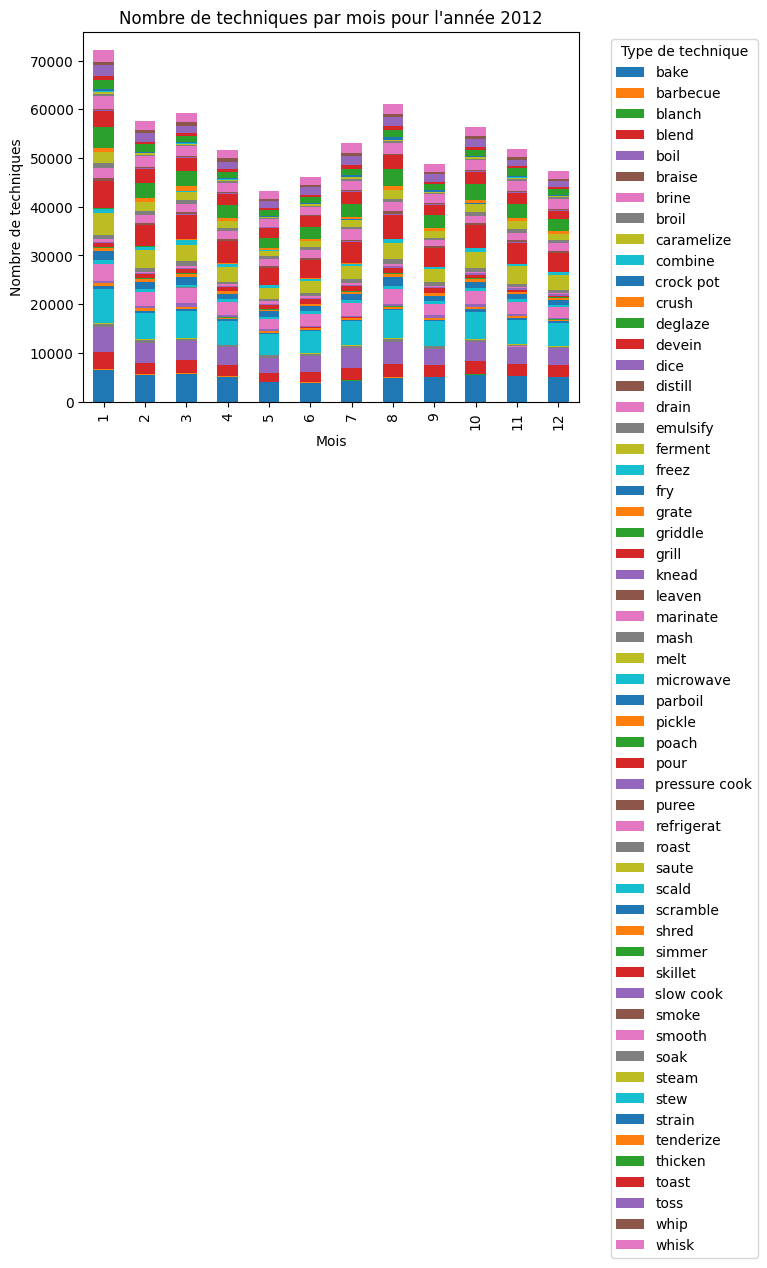

<Figure size 640x480 with 0 Axes>

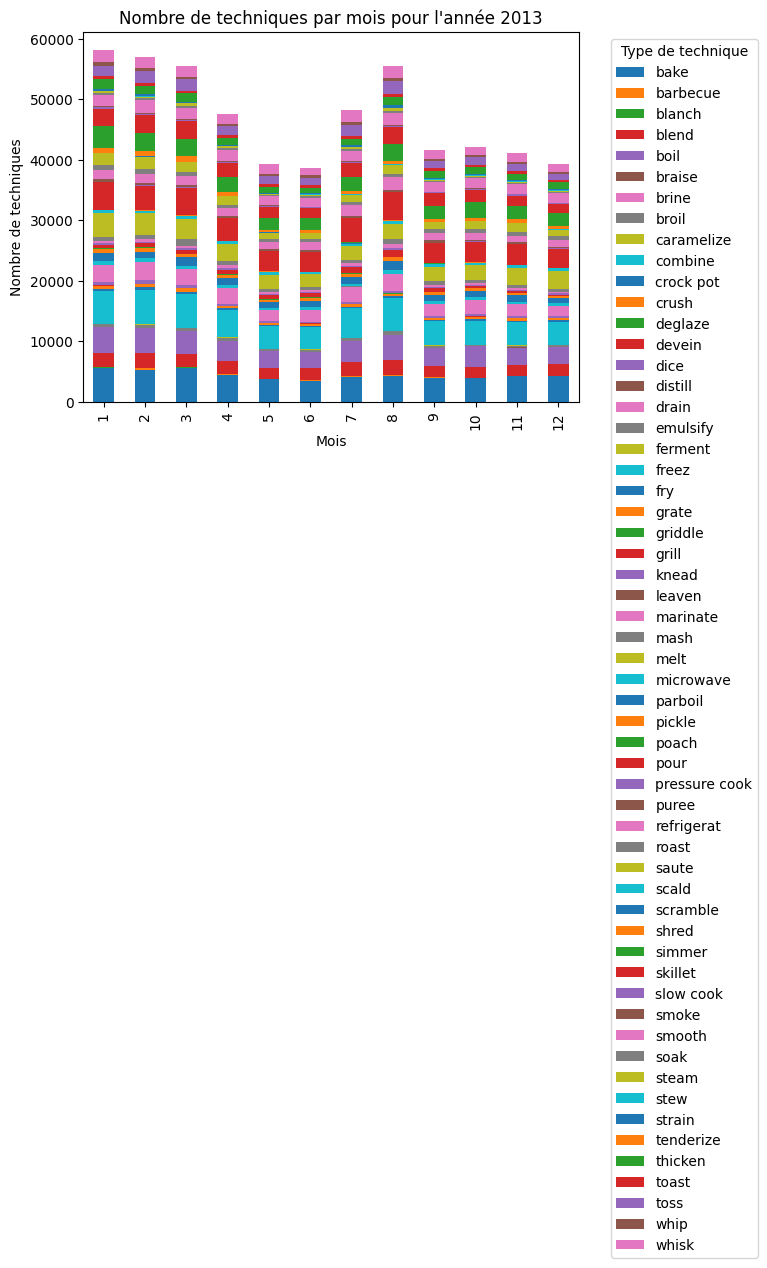

<Figure size 640x480 with 0 Axes>

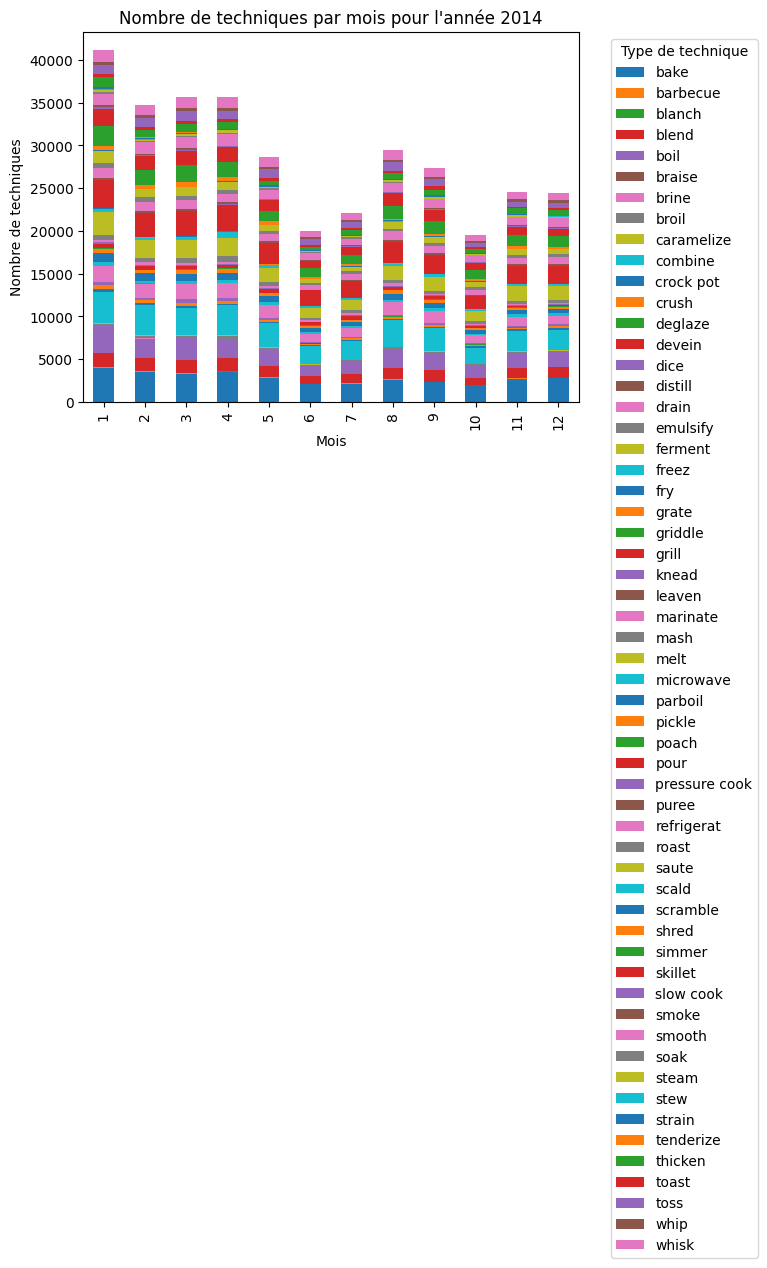

<Figure size 640x480 with 0 Axes>

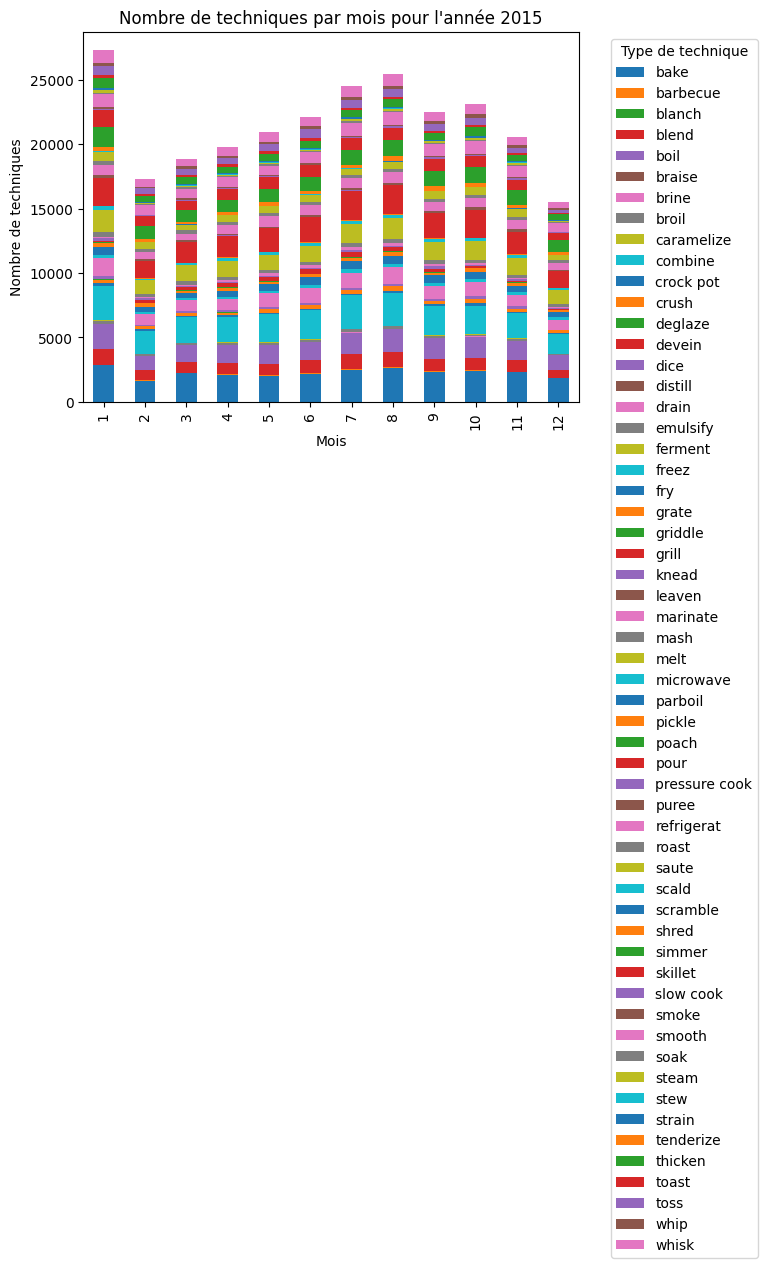

<Figure size 640x480 with 0 Axes>

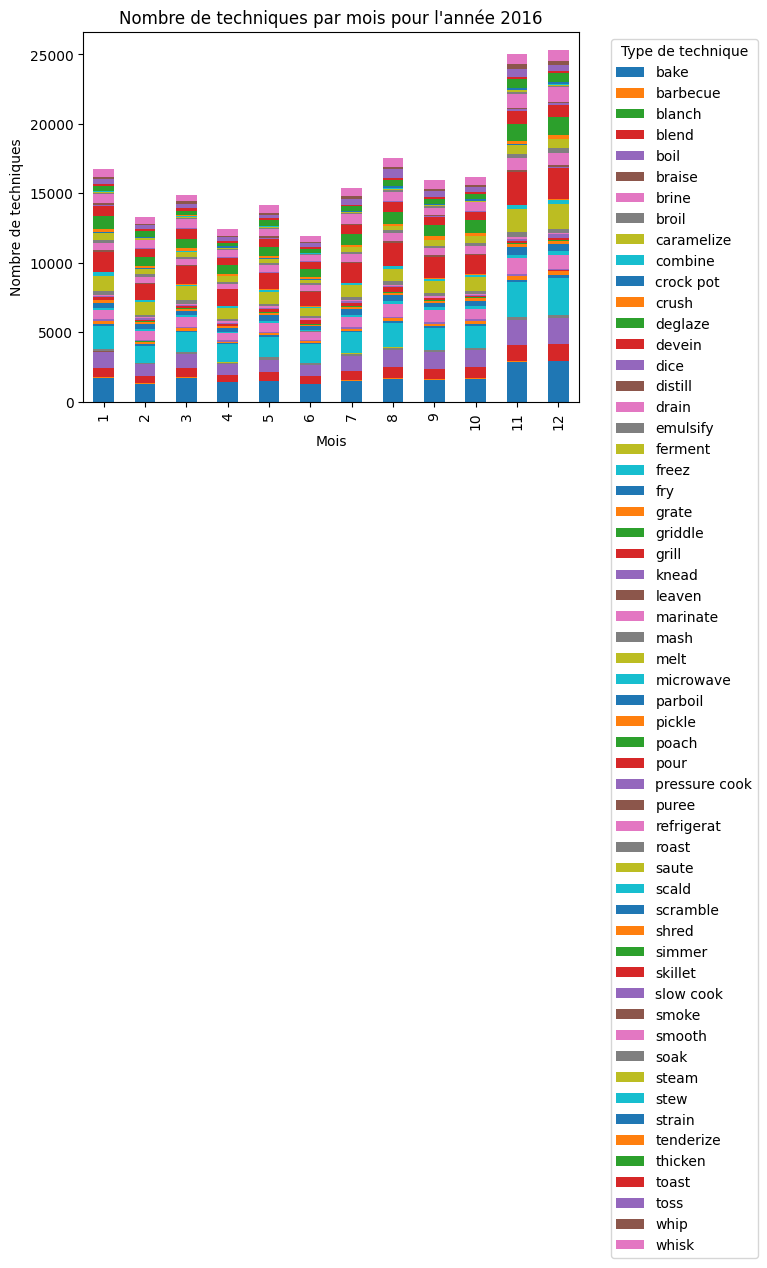

<Figure size 640x480 with 0 Axes>

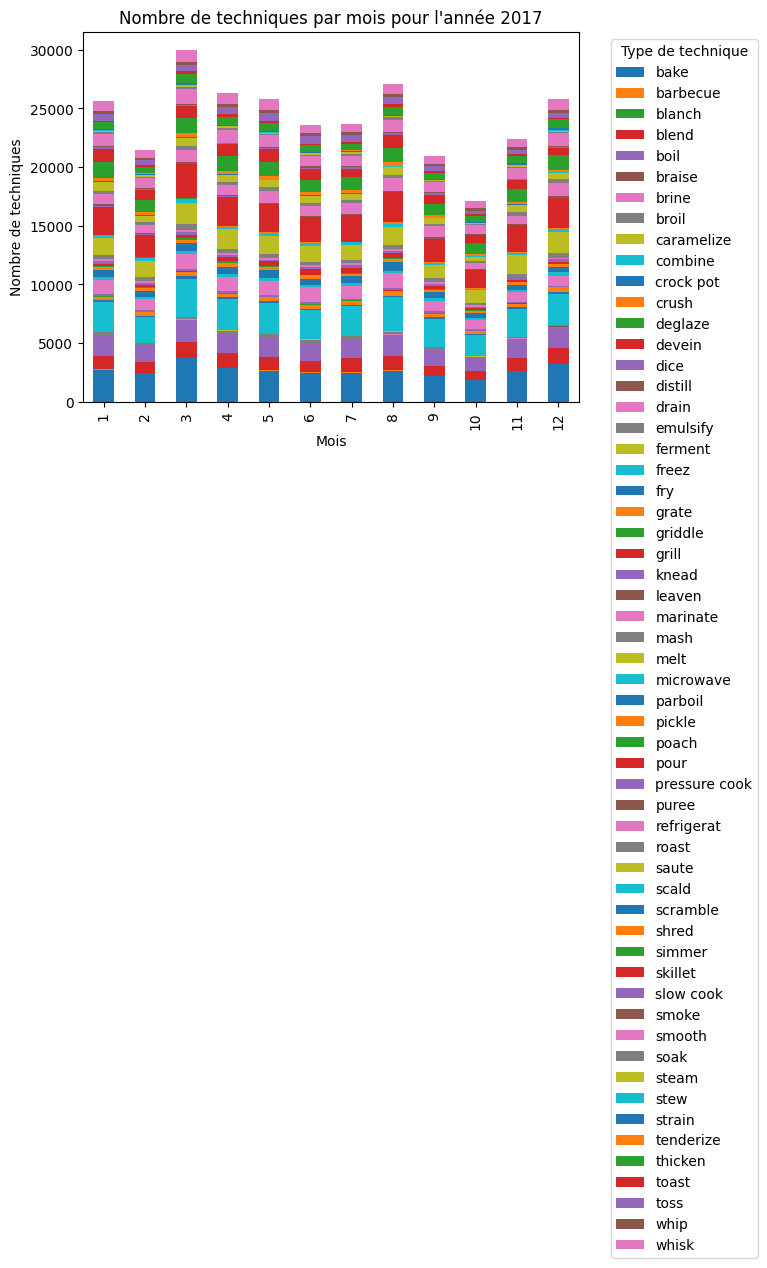

<Figure size 640x480 with 0 Axes>

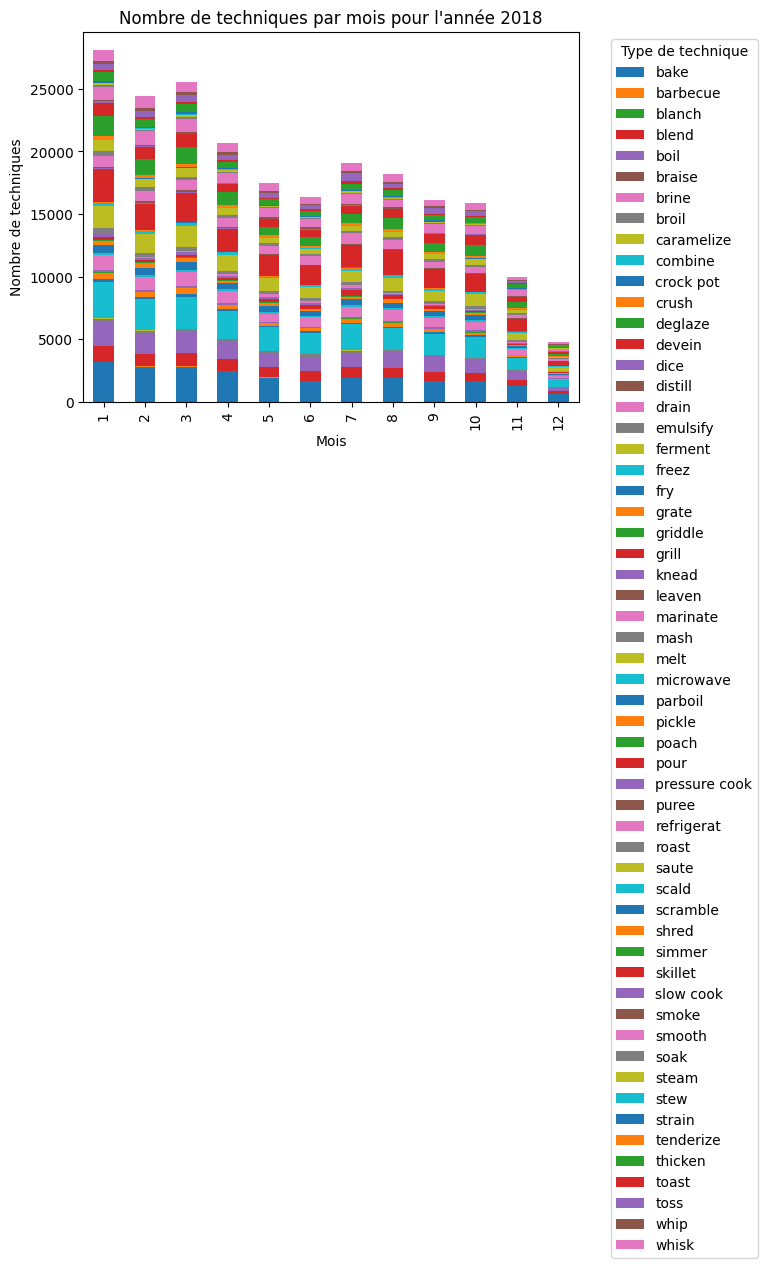

In [21]:
# Aplatir les listes de techniques et répéter les autres colonnes en conséquence
df_flat = df_test.explode('techniques')

# Grouper par année, mois et type de technique, puis compter le nombre de techniques
monthly_tech_count = df_flat.groupby(['year', 'month', 'techniques'])['nb_techniques'].sum().unstack()

# Créer un bar plot empilé pour chaque année
for year in monthly_tech_count.index.get_level_values('year').unique():
    plt.figure()
    monthly_tech_count.loc[year].plot(kind='bar', stacked=True)
    plt.xlabel('Mois')
    plt.ylabel('Nombre de techniques')
    plt.title(f'Nombre de techniques par mois pour l\'année {year}')
    plt.legend(title='Type de technique', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

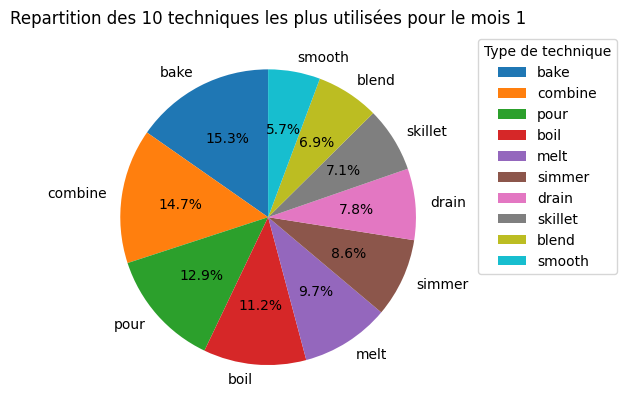

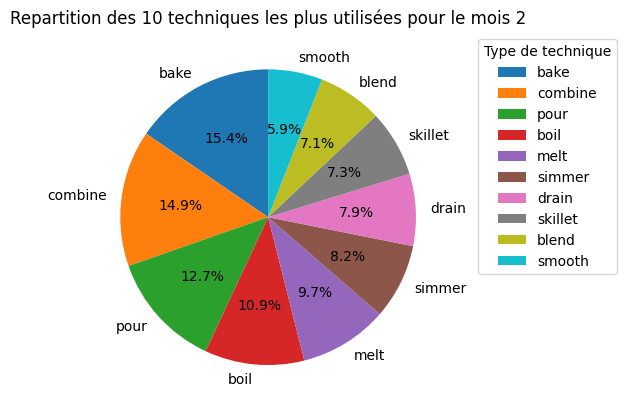

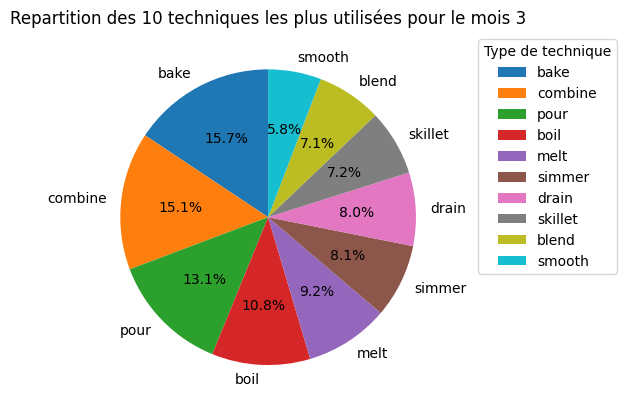

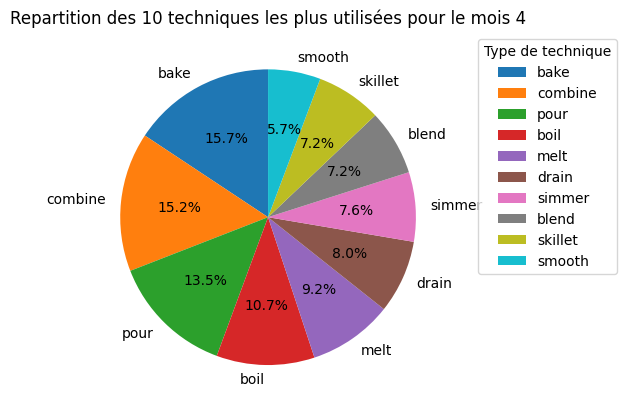

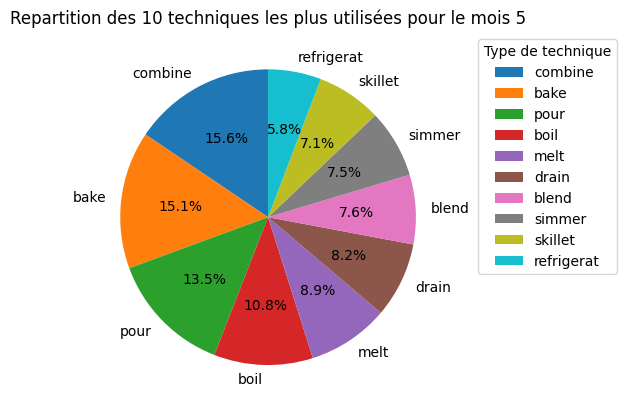

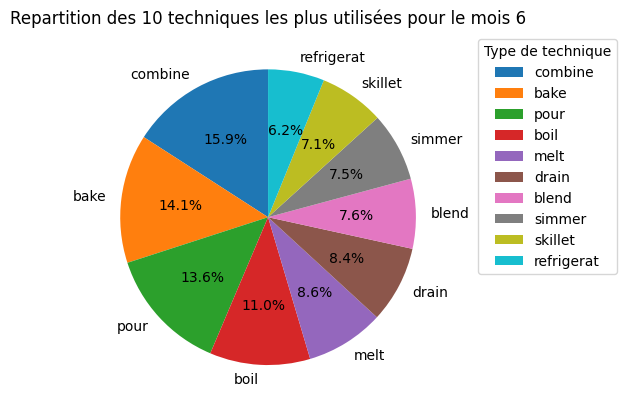

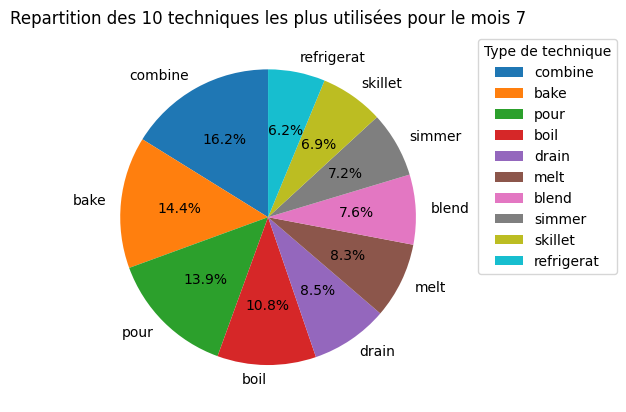

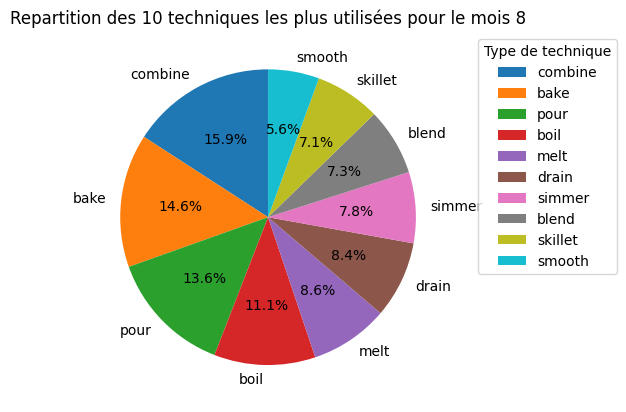

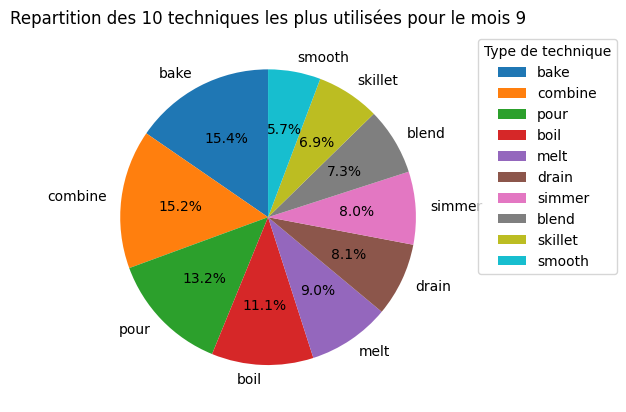

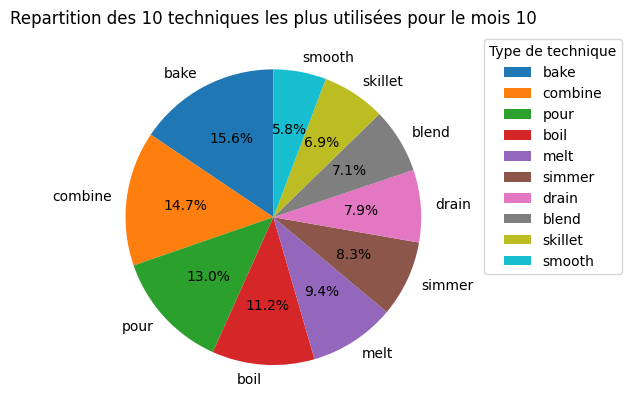

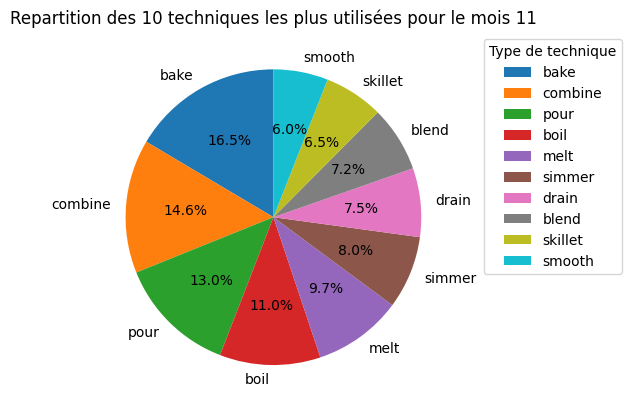

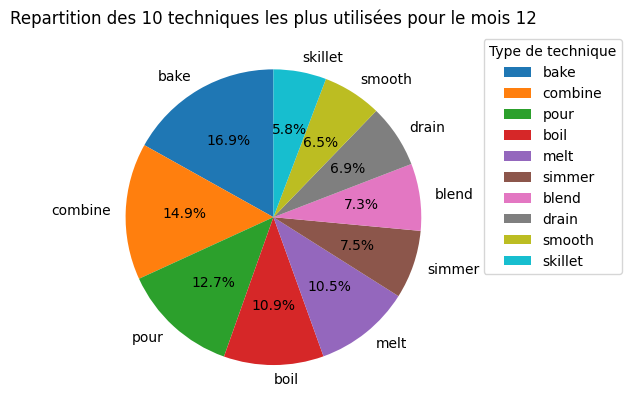

In [22]:
# Grouper par mois et par type de technique, puis compter le nombre de techniques
monthly_tech_count = df_flat.groupby(['month', 'techniques'])['nb_techniques'].sum().unstack()

# Créer un camembert pour chaque mois en ne montrant que les 10 techniques les plus utilisées
for month in monthly_tech_count.index:
    top_10_techniques = monthly_tech_count.loc[month].nlargest(10)
    plt.figure()
    #si on veut tout
    #monthly_tech_count.loc[month].plot(kind='pie', autopct='%1.1f%%', startangle=90) si on veut tout
    top_10_techniques.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.ylabel('')
    plt.title(f'Repartition des 10 techniques les plus utilisées pour le mois {month}')
    plt.legend(title='Type de technique', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

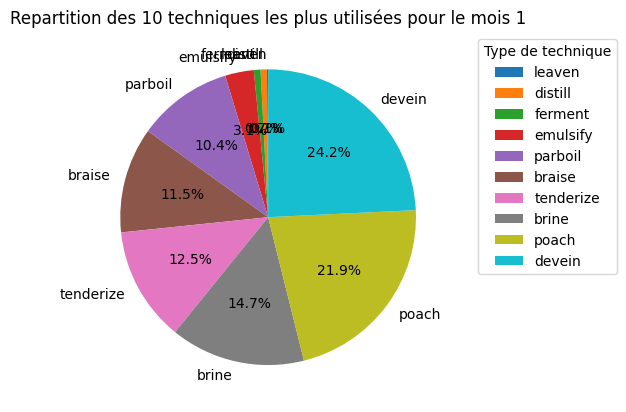

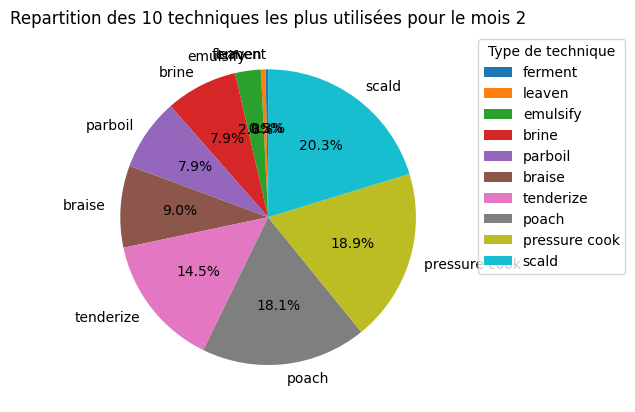

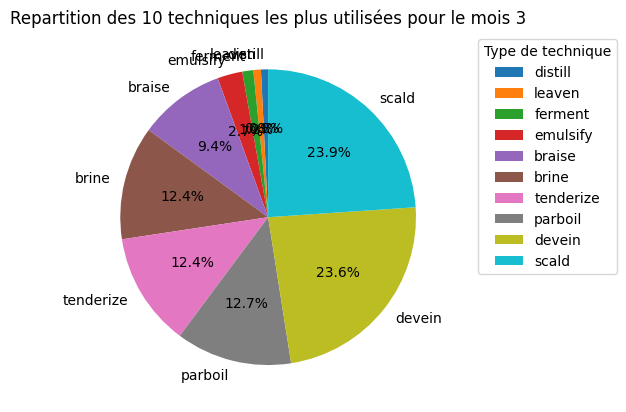

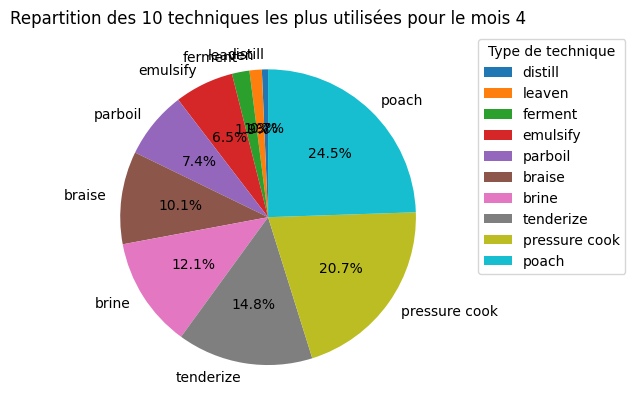

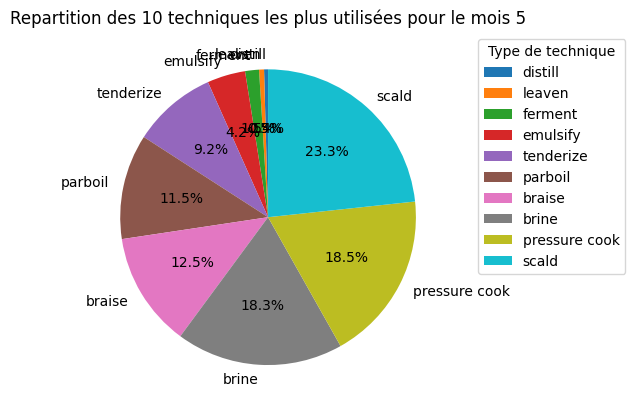

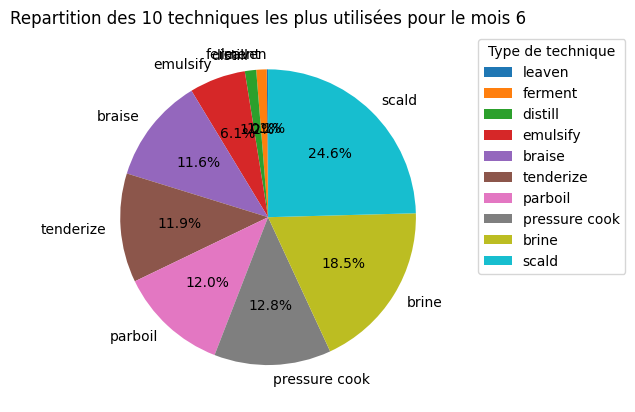

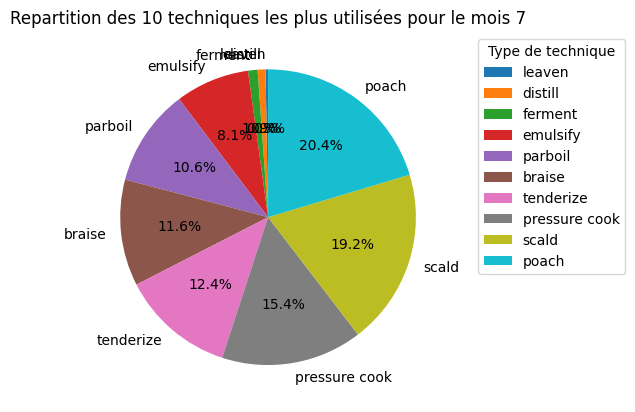

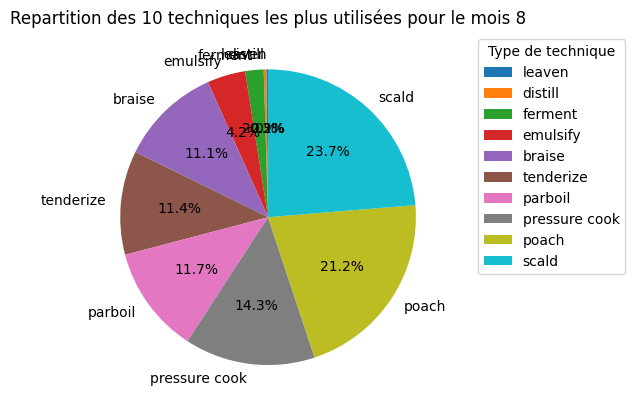

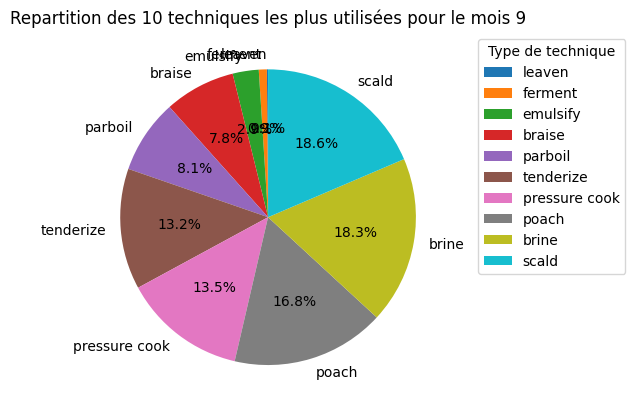

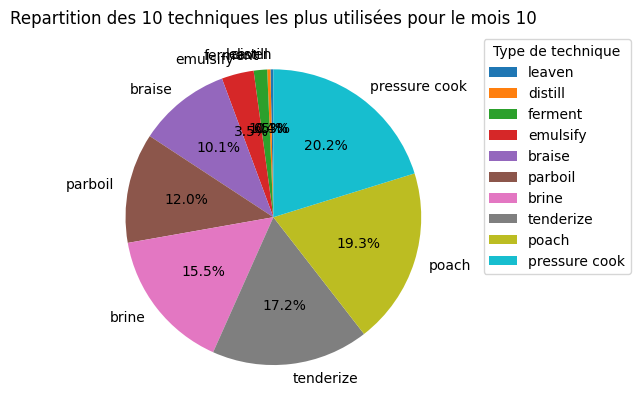

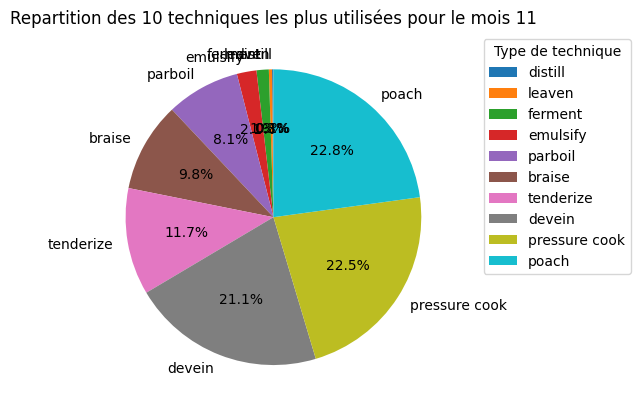

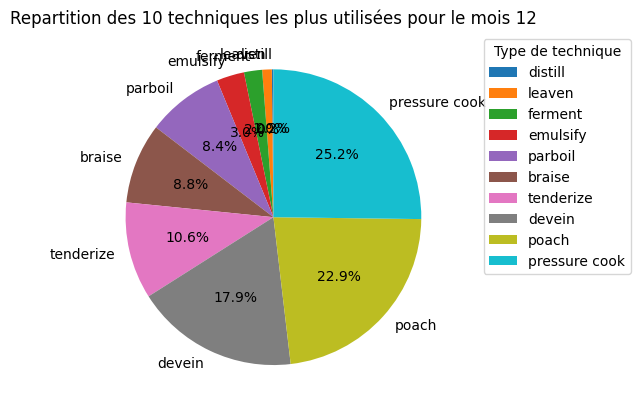

In [ ]:
# Grouper par mois et par type de technique, puis compter le nombre de techniques
monthly_tech_count = df_flat.groupby(['month', 'techniques'])['nb_techniques'].sum().unstack()

# Créer un camembert pour chaque mois en ne montrant que les 10 techniques les moins utilisées
for month in monthly_tech_count.index:
    top_10_techniques = monthly_tech_count.loc[month].nsmallest(10)
    plt.figure()
    top_10_techniques.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.ylabel('')
    plt.title(f'Repartition des 10 techniques les moins utilisées pour le mois {month}')
    plt.legend(title='Type de technique', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

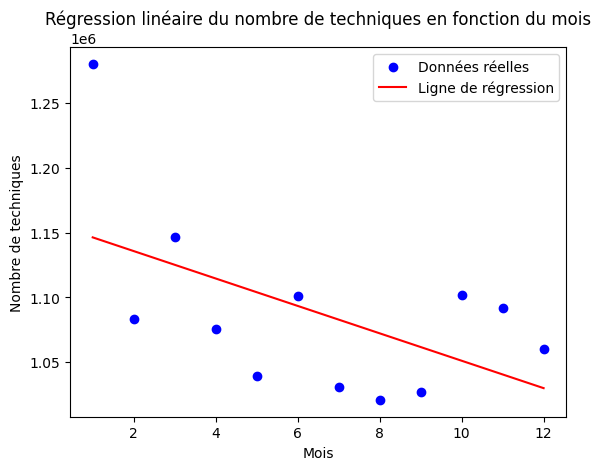

Coefficient de régression (pente): -10591.143356643357
Ordonnée à l'origine: 1156850.6818181819


In [24]:
monthly_tech_count = df_flat.groupby('month')['nb_techniques'].sum().reset_index()

# Préparation des variables pour la régression
X = monthly_tech_count['month'].values.reshape(-1, 1)  # Variable indépendante (mois)
y = monthly_tech_count['nb_techniques'].values  # Variable dépendante (nombre de techniques)

# Effectuer la régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Visualisation des résultats
plt.scatter(X, y, color='blue', label='Données réelles')
plt.plot(X, y_pred, color='red', label='Ligne de régression')
plt.xlabel('Mois')
plt.ylabel('Nombre de techniques')
plt.title('Régression linéaire du nombre de techniques en fonction du mois')
plt.legend()
plt.show()

# Afficher les coefficients de la régression
print(f'Coefficient de régression (pente): {model.coef_[0]}')
print(f'Ordonnée à l\'origine: {model.intercept_}')

In [32]:
df_flat

id techniques  nb_techniques       date  year  month
0          992       bake              2 2000-01-25  2000      1
0          992    combine              2 2000-01-25  2000      1
1         4684      drain              5 2000-02-25  2000      2
1         4684      grill              5 2000-02-25  2000      2
1         4684   marinate              5 2000-02-25  2000      2
...        ...        ...            ...        ...   ...    ...
935117   11763       bake              1 2018-12-19  2018     12
935118  314535       boil              3 2018-12-19  2018     12
935118  314535     simmer              3 2018-12-19  2018     12
935118  314535    skillet              3 2018-12-19  2018     12
935119   63786    skillet              1 2018-12-20  2018     12

[3105105 rows x 6 columns]

In [ ]:
# HS car nb de parametres trop important ici donc résultat faussé
contingency_table = pd.crosstab(df_flat['month'], df_flat['techniques'])

# Effectuer le test du chi-carré d'indépendance
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print(f"Chi2 Statistique: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Tableau des fréquences attendues:")
print(expected)

# Interprétation des résultats
# Si la p-value est inférieure à 0.05, cela indique une corrélation significative entre les deux variables
if p < 0.05:
    print("Il existe une corrélation significative entre le type de technique et le mois.")
else:
    print("Il n'existe pas de corrélation significative entre le type de technique et le mois.")